# Import and mounting

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Mounthing the fraudsters data

In [36]:
PATH = "fraudsters.csv"
df_fraud = pd.read_csv(PATH)
df_fraud.head()
df_fraud.shape

(363, 61)

Mounting the whole dataset

In [37]:
PATH = "Amex_data_2.csv"
df_all = pd.read_csv(PATH)
df_all.head()
df_all.shape

(62484, 62)

# Data Processing

In [38]:
df_all['appl_month'] = le.fit_transform(df_all['appl_month'])
df_all['prod_name'] = le.fit_transform(df_all['prod_name'])
df_all['acq_channel'] = le.fit_transform(df_all['acq_channel'])
df_all['state_code'] = le.fit_transform(df_all['state_code'])
df_all['bureau_src'] = le.fit_transform(df_all['bureau_src'])
df_all['trust_identity'] = le.fit_transform(df_all['trust_identity'])
df_all['addr_mismatch'] = le.fit_transform(df_all['addr_mismatch'])

df_fraud['appl_month'] = le.fit_transform(df_fraud['appl_month'])
df_fraud['prod_name'] = le.fit_transform(df_fraud['prod_name'])
df_fraud['acq_channel'] = le.fit_transform(df_fraud['acq_channel'])
df_fraud['state_code'] = le.fit_transform(df_fraud['state_code'])
df_fraud['trust_identity'] = le.fit_transform(df_fraud['trust_identity'])
df_fraud['addr_mismatch'] = le.fit_transform(df_fraud['addr_mismatch'])
df_fraud['bureau_src'] = le.fit_transform(df_fraud['bureau_src'])

In [39]:
columns_to_keep = ['unique_identifier','prod_name','return_payments', 'risk_score_11', 'risk_score_3', 'risk_score_7',
                   'merchant1_amt', 'decline_txn', 'trust_identity', 'payments', 'default_ind', 'limit', 'acq_channel']
df_fraud_new = df_fraud[columns_to_keep]
df_all_new = df_all[columns_to_keep]

# Analysis

In [ ]:
count = df_fraud[(df_fraud['return_payments'] >= 4100) & (df_fraud['return_payments'] <= 5500)].shape[0]
print(count)

#main dataset
count = df_all[(df_all['return_payments'] >= 4100) & (df_all['return_payments'] <= 5500)].shape[0]
print(count)

8
41


In [ ]:
temp_fraud = df_fraud[(df_fraud['risk_score_3'] >= 20) & (df_fraud['risk_score_3'] <= 200)]
temp_all = df_all[(df_all['risk_score_3'] >= 20) & (df_all['risk_score_3'] <= 200)]

In [ ]:
import pandas as pd

# Select only numerical columns
df_numeric = df_all_new.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with the default_ind (fraud label)
fraud_correlation = correlation['default_ind'].sort_values(ascending=False)

# Display the correlations
print(fraud_correlation[:])

default_ind          1.000000
return_payments      0.171647
risk_score_2         0.084192
risk_score_3         0.078721
risk_score_7         0.066788
merchant1_amt        0.054036
decline_txn          0.043275
acq_channel          0.017643
payments             0.004454
unique_identifier    0.000615
limit               -0.024594
trust_identity      -0.071699
Name: default_ind, dtype: float64


In [ ]:
import pandas as pd
import scipy.stats as stats

# Group data by fraud and non-fraud
fraud_group = df_all[df_all['default_ind'] == 1]['default_ind']
non_fraud_group = df_all[df_all['default_ind'] == 0]['default_ind']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(fraud_group, non_fraud_group)

# Output the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")


F-Statistic: inf
P-Value: 0.0
The difference between the groups is statistically significant.


/Users/amanraghuwanshi/Desktop/A1P/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [584]:
import pandas as pd

# Select only numerical columns
df_numeric = df_all.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with the default_ind (fraud label)
fraud_correlation = correlation['risk_score_11'].sort_values(ascending=False)

# Display the correlations
print(fraud_correlation[:])


risk_score_11     1.000000
trust_identity    0.191293
prod_name         0.167216
limit             0.141333
addr_mismatch     0.098351
                    ...   
risk_score_2     -0.124734
no_phn_to_addr   -0.130116
risk_score_7     -0.134615
risk_score_1     -0.144511
Unnamed: 61            NaN
Name: risk_score_11, Length: 62, dtype: float64


In [585]:
dataset_fraud = df_fraud[(df_fraud['limit'] < 5000) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = df_all[(df_all['limit'] < 5000) ]
print(dataset.shape[0])

159
20765


In [586]:
dataset_fraud = dataset_fraud[(dataset_fraud['return_payments'] > 0) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = dataset[(dataset['return_payments'] > 0) ]
print(dataset.shape[0])

49
625


In [587]:
dataset_fraud = dataset_fraud[(dataset_fraud['trust_identity'] < 1) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = dataset[(dataset['trust_identity'] < 1) ]
print(dataset.shape[0])

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
dataset_fraud = dataset_fraud[(dataset_fraud['risk_score_2'] > 4) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = dataset[(dataset['risk_score_2'] > 4) ]
print(dataset.shape[0])

In [ ]:
dataset_fraud = dataset_fraud[(dataset_fraud['bureau_score'] > 850) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = dataset[(dataset['bureau_score'] > 850) ]
print(dataset.shape[0])

89
2950


In [ ]:
dataset.describe()['trust_identity']

,trust_identity
count,368.000000
mean,0.728261
std,0.592473
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
count1 = dataset_fraud[(dataset_fraud['trust_identity'] < 1)].shape[0]
# print(count)
count2 = dataset[(dataset['trust_identity'] < 1)].shape[0]
print(1, count1, count2)

1 37 128


In [ ]:
t=0.00005
while t < 0.243270:
  count1 = dataset_fraud[(dataset_fraud['risk_score_2'] > t)].shape[0]
  # print(count)
  count2 = dataset[(dataset['risk_score_2'] > t)].shape[0]
  print(t, count1, count2)
  t+=-0.001




In [ ]:
df_all_new.shape

(62484, 12)

## linear_regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_all_new.iloc[:, :-2]
y = df_all_new['default_ind']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
poly = PolynomialFeatures(degree=2) # you can change the degree as needed
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
weights = model.coef_
print("Weights for risk_score_1 and state_code:", weights)

model.fit(X_train, y_train)

# # Get the weights
# weights = model.coef_
# print("Weights", weights)

# Make predictions on the test set
# y_pred = model.predict(X_test)

y_pred = model.predict(X_poly)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

new_risk = (X_poly @ weights)
df_all_new['new_risk'] = pd.Series(new_risk)
# Calculate the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
# Create the new_risk feature
# feature_names = X.columns
# new_risk = sum(weights[i] * X[feature_names[i]] for i in range(len(weights)))
# df_all_new['new_risk'] = new_risk


# Correlation Analysis

In [ ]:
import pandas as pd

# Select only numerical columns
df_numeric = df_all_new.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with the default_ind (fraud label)
fraud_correlation = correlation['default_ind'].sort_values(ascending=False)

# Display the correlations
print(fraud_correlation[:60])

default_ind        1.000000
new_risk           0.214963
return_payments    0.171647
risk_score_2       0.084192
risk_score_3       0.078721
risk_score_7       0.066788
merchant1_amt      0.054036
merchant2_amt      0.047185
decline_txn        0.043275
bureau_score       0.024020
acq_channel        0.017643
limit             -0.024594
trust_identity    -0.071699
Name: default_ind, dtype: float64


In [ ]:
import pandas as pd
import scipy.stats as stats

# Group data by fraud and non-fraud
fraud_group = df_all[df_all['default_ind'] == 1]['basic_no_trd']
non_fraud_group = df_all[df_all['default_ind'] == 0]['basic_no_trd']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(fraud_group, non_fraud_group)

# Output the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")


F-Statistic: 59.90330497553866
P-Value: 1.0112199965348285e-14
The difference between the groups is statistically significant.


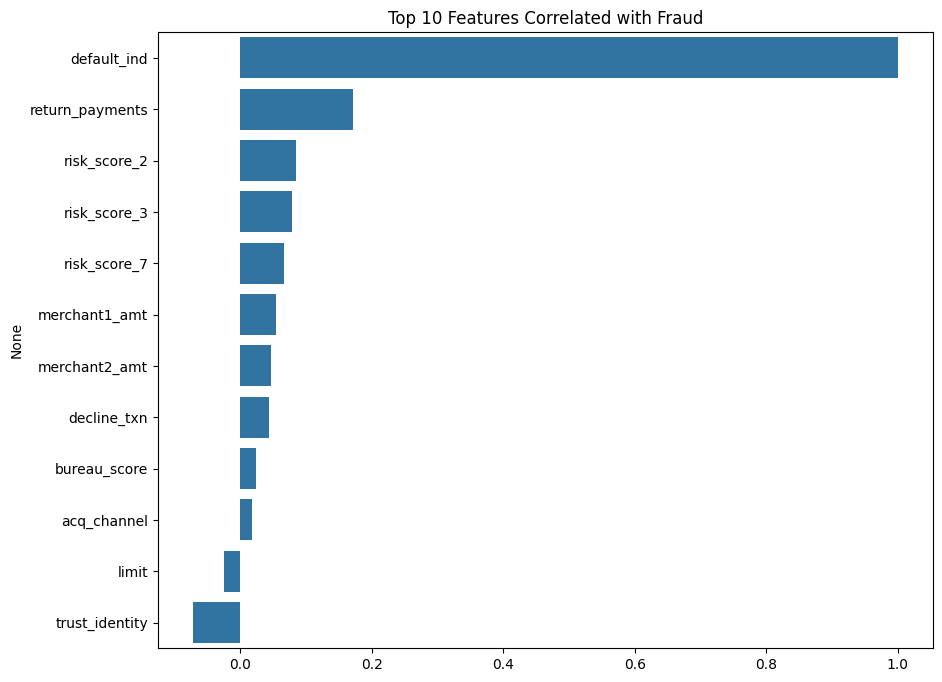

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 correlated features
top_corr = pd.concat([fraud_correlation.head(10), fraud_correlation.tail(10)]) # Use pd.concat to combine Series

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with Fraud')
plt.show()

In [ ]:
df_fraud = df_fraud[~df_fraud['unique_identifier'].isin(df_detected['unique_identifier'])]
df_all = df_all[~df_all['unique_identifier'].isin(df_detected['unique_identifier'])]

In [ ]:
df_fraud.describe().iloc[:, :]

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,Unnamed: 8,income,...,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind,debt_to_income_ratio,new_risk
count,363.00000,368.000000,368.000000,368.000000,368.000000,368.000000,363.000000,368.000000,0.0,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.0,363.000000,363.000000
mean,131387.61708,2.535326,1.720109,1.668478,15.230978,0.546196,3.164738,7.163043,NaN,102768.595041,...,533.985317,6.151515,0.198347,0.054223,0.007780,0.047909,0.221372,1.0,0.621513,-73.159868
std,17184.63406,1.852563,2.084176,0.995295,12.407408,0.762212,3.278335,2.642256,NaN,111565.858483,...,1095.858766,6.037330,0.399305,0.177612,0.054413,0.075816,0.092269,0.0,0.414957,154.959679
min,100001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086800,1.0,-0.799338,-1830.821964
25%,120245.50000,1.000000,0.000000,1.000000,2.000000,0.000000,0.700000,5.000000,NaN,55000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158400,1.0,0.559798,-78.462418
50%,131240.00000,3.000000,0.000000,2.000000,11.000000,0.000000,2.400000,8.000000,NaN,75000.000000,...,55.930000,7.000000,0.000000,0.002000,0.000000,0.027000,0.188400,1.0,0.638883,-11.205016
75%,143264.00000,4.000000,4.000000,2.000000,27.000000,1.000000,4.400000,10.000000,NaN,110000.000000,...,556.010000,12.000000,0.000000,0.021500,0.000800,0.061000,0.262700,1.0,0.699809,-1.867606
max,162484.00000,6.000000,7.000000,4.000000,40.000000,3.000000,23.500000,11.000000,NaN,1000000.000000,...,7652.440000,24.000000,1.000000,0.999000,0.743000,0.611000,0.557300,1.0,7.472083,0.009448


#Strategy 1

In [ ]:
#strategy1

#fraud dataset
dataset_fraud = df_fraud[(df_fraud['risk_score_3'] > 2) ]
print(dataset_fraud.shape[0])

#main dataset
dataset = df_all[(df_all['risk_score_3'] > 2) ]
print(dataset.shape[0])

226
12323


Filter of return payments > 0

In [ ]:
count = dataset_fraud[(dataset_fraud['return_payments'] > 0)].shape[0]
print(count)
count = dataset[(dataset['return_payments'] > 0)].shape[0]
print(count)

52
368


In [ ]:
dataset_new = dataset[(dataset['return_payments'] > 0)]
dataset_fraud_new = dataset_fraud[(dataset_fraud['return_payments'] > 0)]

# dataset_fraud_new.describe()

Filter no_trd == 1

In [ ]:
count = dataset_fraud_new[(dataset_fraud_new['no_trd'] == 1)].shape[0]
print(count)
count = dataset_new[(dataset_new['no_trd'] == 1)].shape[0]
print(count)

28
57


In [ ]:
dataset_new = dataset_new[(dataset_new['no_trd'] == 1)]
dataset_fraud_new = dataset_fraud_new[(dataset_fraud_new['no_trd'] == 1)]

print(dataset_fraud_new.shape[0])
print(dataset_new.shape[0])
# dataset_fraud_new.describe()

28
57


Filter lod_open_trd_ms <= 4

In [ ]:
count = dataset_new[(dataset_new['old_open_trd_ms'] <=4 )].shape[0]
print(count)
count = dataset_fraud_new[(dataset_fraud_new['old_open_trd_ms'] <= 4)].shape[0]
print(count)

29
21


In [ ]:
dataset_new = dataset_new[(dataset_new['old_open_trd_ms'] <= 4)]
dataset_fraud_new = dataset_fraud_new[(dataset_fraud_new['old_open_trd_ms'] <= 4)]

print(dataset_fraud_new.shape[0])
print(dataset_new.shape[0])
# dataset_fraud_new.describe()

21
29


Filter based on risk_score_9

In [ ]:
count = dataset_new[(dataset_new['risk_score_9'] <= 0.001 )].shape[0]
print(count)
count = dataset_fraud_new[(dataset_fraud_new['risk_score_9'] <= 0.001)].shape[0]
print(count)

22
18


Filter based on bureau_mismatch

In [ ]:
count = dataset_new[(dataset_new['risk_score_9'] <= 0.001 ) & (dataset_new['bureau_mismatch'] < 2 )].shape[0]
print(count)
count = dataset_fraud_new[(dataset_fraud_new['risk_score_9'] <= 0.001) & (dataset_fraud_new['bureau_mismatch'] < 2 )].shape[0]
print(count)

20
18


In [ ]:
dataset_new = dataset_new[(dataset_new['risk_score_9'] <= 0.001) & (dataset_new['bureau_mismatch'] < 2 )]
dataset_fraud_new = dataset_fraud_new[(dataset_fraud_new['risk_score_9'] <= 0.001) & (dataset_fraud_new['bureau_mismatch'] < 2 )]

print(dataset_fraud_new.shape[0])
print(dataset_new.shape[0])
# dataset_fraud_new.describe()

Filter Risk score 10 < 0.054

In [ ]:
count = dataset_new[(dataset_new['risk_score_10'] < 0.054 )].shape[0]
print(count)
count = dataset_fraud_new[(dataset_fraud_new['risk_score_10'] < 0.054)].shape[0]
print(count)

14
14


In [ ]:
dataset_new = dataset_new[(dataset_new['risk_score_10'] < 0.054)]
dataset_fraud_new = dataset_fraud_new[(dataset_fraud_new['risk_score_10'] < 0.054)]

print(dataset_fraud_new.shape[0])
print(dataset_new.shape[0])
# dataset_fraud_new.describe()

14
14


Converting the detected frauds into csv

In [ ]:
detected_fraud = dataset_new
detected_fraud.to_csv('/content/drive/MyDrive/detected_fraud.csv', index=True)

In [ ]:
count = df_all[(df_all['new_risk'] < -1490)].shape[0]
print(count)
count = df_fraud[(df_fraud['new_risk'] < -1490)].shape[0]
print(count)

35
1


In [ ]:
count = dataset_fraud[(dataset_fraud['decline_txn'] > 215)].shape[0]
print(count)
count = dataset[(dataset['decline_txn'] > 215)].shape[0]
print(count)
#0.02164
df_detected = pd.concat([df_detected, dataset_fraud[(dataset_fraud['decline_txn'] > 215)]], ignore_index=True)
df_detected.to_csv('detected_fraud.csv', index=True)

2
2


# Strategies

### Strategy 1

In [596]:
def strategy1(fraud, all):
    fraud = fraud[fraud['risk_score_2'] > 0.015]
    all = all[all['risk_score_2'] > 0.015]

    fraud = fraud[fraud['return_payments'] > 2826]
    all = all[all['return_payments'] > 2826]

    fraud = fraud[fraud['decline_txn'] > 20]
    all = all[all['decline_txn'] > 20]

    fraud['strategy'] = 1
    all['strategy'] = 1

    return fraud, all



### strategy 2

In [597]:
def strategy2(fraud, all):
    fraud = fraud[fraud['return_payments'] > 10000]
    all = all[all['return_payments'] > 10000]

    fraud = fraud[fraud['risk_score_7'] > 171]
    all = all[all['risk_score_7'] > 171]

    fraud = fraud[fraud['trust_identity'] == 0]
    all = all[all['trust_identity'] == 0]

    fraud = fraud[(fraud['decline_txn'] > 5) | (fraud['decline_txn'] == 0)]
    all = all[(all['decline_txn'] > 5) | (all['decline_txn'] == 0)]

    fraud['strategy'] = 2
    all['strategy'] = 2

    return fraud, all

### strategy 3

In [598]:
def strategy3(fraud, all):

    fraud = fraud[(fraud['risk_score_2'] >= 0.045)]
    all = all[(all['risk_score_2'] >= 0.045)]

    fraud = fraud[(fraud['decline_txn'] >= 230) & (fraud['decline_txn'] < 240)]
    all = all[(all['decline_txn'] >= 230) & (all['decline_txn'] < 240)]

    fraud['strategy'] = 3
    all['strategy'] = 3

    return fraud, all

### Strategy 4

In [599]:
def strategy4(fraud, all):
    fraud = fraud[fraud['risk_score_3'] == 184]
    all = all[all['risk_score_3'] == 184]

    fraud['strategy'] = 4
    all['strategy'] = 4

    return fraud, all

### Startegy 5

In [600]:
def strategy5(fraud, all):
    fraud = fraud[fraud['risk_score_3'] > 2]
    all = all[all['risk_score_3'] > 2]

    fraud = fraud[(fraud['return_payments'] >= 2100) & (fraud['return_payments'] <= 2300)]
    all = all[(all['return_payments'] >= 2100) & (all['return_payments'] <= 2300)]

    fraud['strategy'] = 5
    all['strategy'] = 5

    return fraud, all

### strategy 6

In [601]:
def strategy6(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] >= 3389.250000) & (fraud['merchant1_amt'] <= 9700)]
    all = all[(all['merchant1_amt'] >= 3389.250000) & (all['merchant1_amt'] <= 9700)]

    fraud = fraud[(fraud['risk_score_3'] >= 156) & (fraud['risk_score_3'] <= 177)]
    all = all[(all['risk_score_3'] >= 156) & (all['risk_score_3'] <= 177)]

    fraud['strategy'] = 6
    all['strategy'] = 6

    return fraud, all

### strategy 7

In [602]:
def strategy7(fraud, all):
    fraud = fraud[(fraud['return_payments'] >= 2600) & (fraud['return_payments'] <= 2760)]
    all = all[(all['return_payments'] >= 2600) & (all['return_payments'] <= 2760)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.017190)]
    all = all[(all['risk_score_2'] >= 0.017190)]

    fraud['strategy'] = 7
    all['strategy'] = 7

    return fraud, all

### strategy 8

In [603]:
def strategy8(fraud, all):
    fraud = fraud[(fraud['return_payments'] >= 65000) & (fraud['return_payments'] <= 69000)]
    all = all[(all['return_payments'] >= 65000) & (all['return_payments'] <= 69000)]

    fraud['strategy'] = 8
    all['strategy'] = 8

    return fraud, all

### Strategy 9

In [604]:
def strategy9(fraud, all):
    fraud = fraud[(fraud['risk_score_2'] >= 0.029	)]
    all = all[(all['risk_score_2'] >= 0.029	)]

    fraud = fraud[(fraud['return_payments'] >= 4100) & (fraud['return_payments'] <= 5500)]
    all = all[(all['return_payments'] >= 4100) & (all['return_payments'] <= 5500)]

    fraud['strategy'] = 9
    all['strategy'] = 9

    return fraud, all

### Strategy 10

In [605]:
def strategy10(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370	]
    all = all[all['risk_score_2'] >= 0.004370	]

    fraud = fraud[(fraud['return_payments'] >= 29000) & (fraud['return_payments'] <= 32000)]
    all = all[(all['return_payments'] >= 29000) & (all['return_payments'] <= 32000)]

    fraud['strategy'] = 10
    all['strategy'] = 10

    return fraud, all

### Strategy 11

In [606]:
def strategy11(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['return_payments'] >= 1000) & (fraud['return_payments'] <= 28000)]
    all = all[(all['return_payments'] >= 1000) & (all['return_payments'] <= 28000)]

    fraud = fraud[(fraud['payments'] >= 0) & (fraud['payments']<=100)]
    all = all[(all['payments'] >= 0) & (all['payments'] <= 100)]

    fraud = fraud[(fraud['trust_identity'] == 0) ]
    all = all[(all['trust_identity'] == 0)]

    fraud = fraud[(fraud['risk_score_7'] >= 118) & (fraud['risk_score_7'] <= 398)]
    all = all[(all['risk_score_7'] >= 118) & (all['risk_score_7'] <= 398)]

    fraud['strategy'] = 11
    all['strategy'] = 11

    return fraud, all


### Strategy 12

In [607]:
def strategy12(fraud, all):
    fraud = fraud[((fraud['risk_score_2'] >=0.005450) & (fraud['risk_score_2'] <= 0.074230))]
    all = all[((all['risk_score_2'] >= 0.005450) & (all['risk_score_2'] <= 0.074230))]

    fraud = fraud[(fraud['decline_txn'] >=3) & (fraud['decline_txn'] <= 31)]
    all = all[(all['decline_txn'] >= 3) & (all['decline_txn'] <= 31)]

    fraud = fraud[(fraud['risk_score_7'] >= 450) & (fraud['risk_score_7'] <= 494)]
    all = all[(all['risk_score_7'] >= 450) & (all['risk_score_7'] <= 494)]

    fraud = fraud[(fraud['risk_score_3'] > 45) & (fraud['risk_score_3'] <= 178)]
    all = all[(all['risk_score_3'] > 45) & (all['risk_score_3'] <= 178)]

    fraud = fraud[(fraud['payments'] < 9200)]
    all = all[(all['payments'] < 9200)]

    fraud = fraud[(fraud['merchant1_amt'] >= 1600)]
    all = all[(all['merchant1_amt'] >= 1600)]

    fraud['strategy'] = 12
    all['strategy'] = 12

    return fraud, all

### strategy 13

In [608]:
def strategy13(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['decline_txn'] > 4) ]
    all = all[(all['decline_txn'] > 4)]

    fraud = fraud[(fraud['merchant1_amt'] >5000) ]
    all = all[(all['merchant1_amt'] > 5000)]

    fraud = fraud[(fraud['limit'] >= 35000) | ((fraud['limit'] >= 21000) & (fraud['limit'] <= 24000)) | ((fraud['limit'] >= 26000) & (fraud['limit'] <= 27000))]
    all = all[(all['limit'] >= 35000) | ((all['limit'] >= 21000) & (all['limit'] <= 24000)) | ((all['limit'] >= 26000) & (all['limit'] <= 27000))]

    fraud['strategy'] = 13
    all['strategy'] = 13

    return fraud, all

### Strategy 14

In [609]:
def strategy14(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['decline_txn'] >= 9) & (fraud['decline_txn'] <= 15)]
    all = all[(all['decline_txn'] >= 9) & (all['decline_txn'] <= 15)]

    fraud = fraud[(fraud['return_payments'] >= 3000) & (fraud['return_payments'] <= 32000)]
    all = all[(all['return_payments'] >= 3000) & (all['return_payments'] <= 32000)]

    fraud = fraud[(fraud['payments'] >= 35000) 
                | ((fraud['payments'] >= 6000) & (fraud['payments'] <= 25000)) 
                | ((fraud['payments'] >= 2000) & (fraud['payments'] <= 3000))
                | ((fraud['payments'] >= 500) & (fraud['payments'] <= 1820)) 
                | ((fraud['payments'] >= 0) & (fraud['payments'] <= 100))]
    all = all[(all['payments'] >= 35000) | ((all['payments'] >= 6000) & (all['payments'] <= 25000)) | ((all['payments'] >= 2000) & (all['payments'] <= 3000))
            | ((all['payments'] >= 500) & (all['payments'] <= 1820)) | ((all['payments'] >= 0) & (all['payments'] <= 100))]
    
    fraud['strategy'] = 14
    all['strategy'] = 14

    return fraud, all

### Strategy 15

In [610]:
def strategy15(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['decline_txn'] >= 10) & (fraud['decline_txn'] <= 254)]
    all = all[(all['decline_txn'] >= 10) & (all['decline_txn'] <= 254)]

    fraud = fraud[ (fraud['return_payments'] == 100) # 1/2
                | (fraud['return_payments'] >= 600) & (fraud['return_payments'] <= 650) #2/3
                | (fraud['return_payments'] == 800) #1
                | (fraud['return_payments'] >= 1450) & (fraud['return_payments'] <= 1490) #1
                | (fraud['return_payments'] >= 1600) & (fraud['return_payments'] <= 1700) #1
                | (fraud['return_payments'] >= 14000) #1
                ] 
    all = all[(all['return_payments'] == 100) # 1/2
                | (all['return_payments'] >= 600) & (all['return_payments'] <= 650) #2/3
                | (all['return_payments'] == 800) #1
                | (all['return_payments'] >= 1450) & (all['return_payments'] <= 1490) #1
                | (all['return_payments'] >= 1600) & (all['return_payments'] <= 1700) #1
                | (all['return_payments'] >= 14000) #1
                ]

    fraud = fraud[(fraud['trust_identity'] < 2)]
    all = all[(all['trust_identity'] < 2) ]

    fraud = fraud[(fraud['merchant1_amt'] > 200)]
    all = all[(all['merchant1_amt'] > 200) ]

    fraud['strategy'] = 15
    all['strategy'] = 15

    return fraud, all

### Strategy 16

In [611]:
def strategy16(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['decline_txn'] >= 1)]
    all = all[(all['decline_txn'] >= 1)]

    fraud = fraud[(fraud['merchant1_amt'] >= 57000) & (fraud['merchant1_amt']<=58000)
                | (fraud['merchant1_amt'] >= 12635) & (fraud['merchant1_amt']<=12640)
                |(fraud['merchant1_amt'] >= 8605) & (fraud['merchant1_amt']<=8625)
                | (fraud['merchant1_amt'] > 8399) & (fraud['merchant1_amt']<=8400)
                |(fraud['merchant1_amt'] >= 8030) & (fraud['merchant1_amt']<=8050)
                | (fraud['merchant1_amt'] >= 7900) & (fraud['merchant1_amt']<=7950)
                |(fraud['merchant1_amt'] >= 6545) & (fraud['merchant1_amt']<=6555)
                |(fraud['merchant1_amt'] >= 5510) & (fraud['merchant1_amt']<=5520)]
    all = all[ (all['merchant1_amt'] >= 57000) & (all['merchant1_amt']<=58000)
            |(all['merchant1_amt'] >= 12635) & (all['merchant1_amt']<=12640)
            |(all['merchant1_amt'] >= 8605) & (all['merchant1_amt']<=8625)
            |(all['merchant1_amt'] > 8399) & (all['merchant1_amt']<=8400)
            |(all['merchant1_amt'] >= 8030) & (all['merchant1_amt']<=8050)
            |(all['merchant1_amt'] >= 7900) & (all['merchant1_amt']<=7950)
            |(all['merchant1_amt'] >= 6545) & (all['merchant1_amt']<=6555)
            |(all['merchant1_amt'] >= 5510) & (all['merchant1_amt']<=5520)]

    fraud = fraud[(fraud['risk_score_3'] > 1)]
    all = all[(all['risk_score_3'] > 1)]

    fraud['strategy'] = 16
    all['strategy'] = 16

    return fraud, all

### strategy 17

In [612]:
def strategy17(fraud, all):
    fraud = fraud[fraud['risk_score_2'] >= 0.004370]
    all = all[all['risk_score_2'] >= 0.004370]

    fraud = fraud[(fraud['decline_txn'] > 1)]
    all = all[(all['decline_txn'] > 1)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
    all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]

    fraud = fraud[(fraud['risk_score_3'] >= 120) & (fraud['risk_score_3'] <= 197)
                | (fraud['risk_score_3'] >= 50) & (fraud['risk_score_3'] <= 90)]
    all = all[(all['risk_score_3'] >= 120) & (all['risk_score_3'] <= 197)
            | (all['risk_score_3'] >= 50) & (all['risk_score_3'] <= 90)]
    
    fraud['strategy'] = 17
    all['strategy'] = 17

    return fraud, all

### strategy 18

In [613]:
def strategy18(fraud, all):
    fraud = fraud[(fraud['trust_identity'] < 1)]
    all = all[(all['trust_identity'] < 1)]

    fraud = fraud[(fraud['decline_txn'] > 40) & (fraud['decline_txn'] <= 50)]
    all = all[(all['decline_txn'] > 40) & (all['decline_txn'] <= 50)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
    all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]

    fraud['strategy'] = 18
    all['strategy'] = 18

    return fraud, all

### strategy 19

In [614]:
def strategy19(fraud, all):
    #0.004862
    fraud = fraud[fraud['risk_score_2'] >= 0.004862]
    all = all[all['risk_score_2'] >= 0.004862]

    fraud = fraud[(fraud['decline_txn'] >= 38) & (fraud['decline_txn'] <= 40)]
    all = all[(all['decline_txn'] >= 38) & (all['decline_txn'] <= 40)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
    all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]

    fraud['strategy'] = 19
    all['strategy'] = 19

    return fraud, all

### strategy

In [615]:
# def strategy20(fraud, all):
#     fraud = fraud[fraud['risk_score_2'] >= 0.003020]
#     all = all[all['risk_score_2'] >= 0.003020]

#     fraud = fraud[(fraud['risk_score_7'] >= 467) & (fraud['risk_score_7'] <= 486)]
#     all = all[(all['risk_score_7'] >= 467) & (all['risk_score_7'] <= 486)]

#     fraud = fraud[(fraud['risk_score_2'] >= 0.045) & (fraud['risk_score_2'] <= 0.055)]
#     all = all[(all['risk_score_2'] >= 0.045) & (all['risk_score_2'] <= 0.055)]

#     fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
#     all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]

#     fraud['strategy'] = 20
#     all['strategy'] = 20

#     return fraud, all

### strategy 20

In [616]:
def strategy20(fraud, all):
    fraud = fraud[fraud['trust_identity'] < 1]
    all = all[all['trust_identity'] < 1]

    fraud = fraud[(fraud['risk_score_7'] >= 467) & (fraud['risk_score_7'] <= 486)]
    all = all[(all['risk_score_7'] >= 467) & (all['risk_score_7'] <= 486)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.025900) & (fraud['risk_score_2'] <= 0.054750)]
    all = all[(all['risk_score_2'] >= 0.025900) & (all['risk_score_2'] <= 0.054750)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
    all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]

    fraud['strategy'] = 20
    all['strategy'] = 20

    return fraud, all

### strategy 21

In [617]:
def strategy21(fraud, all):
    fraud = fraud[fraud['risk_score_3'] > 2]
    all = all[all['risk_score_3'] > 2]

    fraud = fraud[(fraud['return_payments'] >= 50) & (fraud['return_payments'] <= 2000)]
    all = all[(all['return_payments'] >= 50) & (all['return_payments'] <= 2000)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.010190) & (fraud['risk_score_2'] <= 0.054750)]
    all = all[(all['risk_score_2'] >= 0.010190	) & (all['risk_score_2'] <= 0.054750)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4000) & (fraud['merchant1_amt']<=5000)]
    all = all[ (all['merchant1_amt'] >= 4000) & (all['merchant1_amt']<=5000)]
    
    fraud['strategy'] = 21
    all['strategy'] = 21

    return fraud, all

### strategy 22

In [618]:
def strategy22(fraud, all):  
    fraud = fraud[(fraud['risk_score_2'] >= 0.02) | (fraud['risk_score_2'] <= 0.012)]
    all = all[(all['risk_score_2'] >= 0.02) | (all['risk_score_2'] <= 0.012)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.01063) & (fraud['risk_score_2'] <= 0.025500)]
    all = all[(all['risk_score_2'] >= 0.01063) & (all['risk_score_2'] <= 0.025500)]

    fraud = fraud[(fraud['decline_txn'] >= 2) & (fraud['decline_txn'] <= 5)]
    all = all[(all['decline_txn'] >= 2) & (all['decline_txn'] <= 5)]

    fraud = fraud[(fraud['risk_score_3'] > 2)]
    all = all[(all['risk_score_3'] > 2)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4033) & (fraud['merchant1_amt']<= 4690)]
    all = all[ (all['merchant1_amt'] >= 4033) & (all['merchant1_amt']<= 4690)]

    fraud['strategy'] = 22
    all['strategy'] = 22

    return fraud, all

### strategy 23

In [619]:
def strategy23(fraud, all): 
    fraud = fraud[fraud['decline_txn'] >= 22]
    all = all[all['decline_txn'] >=22]

    fraud = fraud[(fraud['risk_score_2'] >= 0.002) & (fraud['risk_score_2'] <= 0.003)]
    all = all[(all['risk_score_2'] >= 0.002) & (all['risk_score_2'] <= 0.003)]

    fraud = fraud[(fraud['risk_score_3'] >= 2) & (fraud['risk_score_3'] <= 18)]
    all = all[(all['risk_score_3'] >= 2) & (all['risk_score_3'] <= 18)]

    fraud = fraud[(fraud['decline_txn'] >= 4) & (fraud['decline_txn'] <= 54)]
    all = all[(all['decline_txn'] >= 4) & (all['decline_txn'] <= 54)]

    fraud = fraud[(fraud['merchant1_amt'] >= 4200) & (fraud['merchant1_amt']<= 5000)]
    all = all[ (all['merchant1_amt'] >= 4200) & (all['merchant1_amt']<= 5000)]

    fraud['strategy'] = 23
    all['strategy'] = 23

    return fraud, all

### strategy 24

In [620]:
def strategy24(fraud, all):
    fraud = fraud[fraud['payments'] < 4100]
    all = all[all['payments'] < 4100]
    fraud = fraud[fraud['trust_identity'] < 1]
    all = all[all['trust_identity'] < 1]
    fraud = fraud[fraud['decline_txn'] <= 11]
    all = all[all['decline_txn'] <=11]
    fraud = fraud[(fraud['risk_score_2'] > 0.005775) & (fraud['risk_score_2'] < 0.052)]
    all = all[(all['risk_score_2'] > 0.005775) & (all['risk_score_2'] < 0.052)]
    fraud = fraud[(fraud['risk_score_3'] >= 33) ]
    all = all[(all['risk_score_3'] >= 33) ]
    fraud = fraud[(fraud['merchant1_amt'] > 3000) & (fraud['merchant1_amt']<= 3400)]
    all = all[ (all['merchant1_amt'] > 3000) & (all['merchant1_amt']<= 3400)]

    fraud['strategy'] = 24
    all['strategy'] = 24

    return fraud, all

# strategies 2

### strategy 25

In [621]:
def strategy25(fraud, all):
    fraud = fraud[fraud['risk_score_2'] < 0.31]
    all = all[all['risk_score_2'] < 0.31]
    
    fraud = fraud[(fraud['risk_score_7'] >= 229) & (fraud['risk_score_7'] <= 452)]
    all = all[(all['risk_score_7'] >= 229) & (all['risk_score_7'] <= 452)]

    fraud = fraud[fraud['payments'] < 4300]
    all = all[all['payments'] < 4300]

    fraud = fraud[fraud['return_payments'] == 0]
    all = all[all['return_payments'] == 0]

    fraud = fraud[(fraud['risk_score_3'] >= 9) & (fraud['risk_score_3'] <= 39)]
    all = all[(all['risk_score_3'] >= 9) & (all['risk_score_3'] <= 39)]
    
    fraud = fraud[(fraud['merchant1_amt'] > 3000) & (fraud['merchant1_amt']<= 3150)]
    all = all[ (all['merchant1_amt'] > 3000) & (all['merchant1_amt']<= 3150)]

    fraud['strategy'] = 25
    all['strategy'] = 25

    return fraud, all

### strategy 26

In [622]:
def strategy26(fraud, all):
    fraud = fraud[fraud['payments'] == 0]
    all = all[all['payments'] == 0]
    fraud = fraud[(fraud['risk_score_3'] >= 139)]
    all = all[(all['risk_score_3'] >= 139)]
    fraud = fraud[(fraud['merchant1_amt'] > 3000) & (fraud['merchant1_amt']<= 4000)]
    all = all[ (all['merchant1_amt'] > 3000) & (all['merchant1_amt']<= 4000)]

    fraud['strategy'] = 26
    all['strategy'] = 26

    return fraud, all

### strategy 27

In [623]:
def strategy27(fraud, all):
    
    fraud = fraud[(fraud['payments'] <= 5200) | (fraud['payments'] >= 65000) |
                ((fraud['payments'] >= 21000) & (fraud['payments'] <= 22000))]
    all = all[(all['payments'] <= 5200) | (all['payments'] >= 65000) | 
            ((all['payments'] >= 21000) & (all['payments'] <= 22000))]
    
    fraud = fraud[((fraud['risk_score_3'] >= 1) & (fraud['risk_score_3'] <= 5)) | (fraud['risk_score_3'] > 45)]
    all = all[((all['risk_score_3'] >= 1) & (all['risk_score_3'] <= 5)) | (all['risk_score_3'] > 45)]

    fraud = fraud[(fraud['decline_txn'] >= 3) & (fraud['decline_txn'] <= 10)]
    all = all[(all['decline_txn'] >= 3) & (all['decline_txn'] <= 10)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.01972) & (fraud['risk_score_2'] <= 0.02614) |
                ((fraud['risk_score_2'] >= 0.06229) & (fraud['risk_score_2'] <= 0.06271))]
    all = all[((all['risk_score_2'] >= 0.01972) & (all['risk_score_2'] <= 0.02614)) | 
            ((all['risk_score_2'] >= 0.06229) & (all['risk_score_2'] <= 0.06271))]
    
    fraud = fraud[(fraud['risk_score_7'] >= 279) & (fraud['risk_score_7'] <= 476)]
    all = all[(all['risk_score_7'] >= 279) & (all['risk_score_7'] <= 476)]

    fraud = fraud[(fraud['merchant1_amt'] > 3000) & (fraud['merchant1_amt']<= 4000)]
    all = all[ (all['merchant1_amt'] > 3000) & (all['merchant1_amt']<= 4000)]

    fraud['strategy'] = 27
    all['strategy'] = 27

    return fraud, all

### strategy 28

In [624]:
def strategy28(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] >= 3199) & (fraud['merchant1_amt']<= 3392)]
    all = all[ (all['merchant1_amt'] >= 3199) & (all['merchant1_amt']<= 3392)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.00162) & (fraud['risk_score_2'] <= 0.02453)]
    all = all[(all['risk_score_2'] >= 0.00162) & (all['risk_score_2'] <= 0.02453)]

    fraud = fraud[(fraud['risk_score_3'] >= 2) & (fraud['risk_score_3'] <= 6)]
    all = all[(all['risk_score_3'] >= 2) & (all['risk_score_3'] <= 6)]

    fraud = fraud[(fraud['decline_txn'] >= 24) ]
    all = all[(all['decline_txn'] >= 24)]

    fraud['strategy'] = 28
    all['strategy'] = 28

    return fraud, all

### strategy 29

In [625]:
def strategy29(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] >= 2000) & (fraud['merchant1_amt']<= 2834)]
    all = all[ (all['merchant1_amt'] >= 2000) & (all['merchant1_amt']<= 2834)]

    fraud = fraud[(fraud['risk_score_3'] >= 6) & (fraud['risk_score_3'] <= 157)]
    all = all[(all['risk_score_3'] >= 6) & (all['risk_score_3'] <= 157)]

    fraud = fraud[(fraud['risk_score_7'] >= 405) & (fraud['risk_score_7'] <= 474)]
    all = all[(all['risk_score_7'] >= 405) & (all['risk_score_7'] <= 474)]

    fraud = fraud[(fraud['decline_txn'] >= 4) & (fraud['decline_txn'] <= 19)]
    all = all[(all['decline_txn'] >= 4) & (all['decline_txn'] <= 19)]

    fraud = fraud[(fraud['payments'] <= 2100)]
    all = all[(all['payments'] <= 2100)]

    fraud['strategy'] = 29
    all['strategy'] = 29

    return fraud, all

### strategy 30

In [626]:
def strategy30(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] >= 2240) & (fraud['merchant1_amt']<= 2840)]
    all = all[ (all['merchant1_amt'] >= 2240) & (all['merchant1_amt']<= 2840)]

    fraud = fraud[(fraud['risk_score_3'] >= 1) & (fraud['risk_score_3'] <= 5)]
    all = all[(all['risk_score_3'] >= 1) & (all['risk_score_3'] <= 5)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.00465	) & (fraud['risk_score_2'] <= 474)]
    all = all[(all['risk_score_2'] >= 0.00465	) & (all['risk_score_2'] <= 474)]

    fraud = fraud[(fraud['decline_txn'] >= 3) & (fraud['decline_txn'] <= 12)]
    all = all[(all['decline_txn'] >= 3) & (all['decline_txn'] <= 12)]

    fraud = fraud[(fraud['payments'] <= 2496)]
    all = all[(all['payments'] <= 2496)]

    fraud = fraud[(fraud['return_payments'] == 0)]
    all = all[(all['return_payments'] == 0)]

    fraud = fraud[(fraud['risk_score_7'] <= 407)]
    all = all[(all['risk_score_7'] <= 407)]

    fraud = fraud[(fraud['trust_identity'] < 2)]
    all = all[(all['trust_identity'] < 2)]

    fraud['strategy'] = 30
    all['strategy'] = 30

    return fraud, all

### strategy 31

In [627]:
def strategy31(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] > 2000) & (fraud['merchant1_amt']<= 2834)]
    all = all[ (all['merchant1_amt'] > 2000) & (all['merchant1_amt']<= 2834)]

    fraud = fraud[(fraud['risk_score_3'] >= 38) & (fraud['risk_score_3'] <= 92)]
    all = all[(all['risk_score_3'] >= 38) & (all['risk_score_3'] <= 92)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.009810) & (fraud['risk_score_2'] <= 0.183670) ] 
    all = all[(all['risk_score_2'] >= 0.009810) & (all['risk_score_2'] <= 0.183670)]

    fraud = fraud[(fraud['decline_txn'] <= 19)]
    all = all[(all['decline_txn'] <= 19)]

    fraud = fraud[(fraud['payments'] <= 80)]
    all = all[(all['payments'] <= 80)]

    fraud = fraud[(fraud['return_payments'] == 0) | (fraud['return_payments'] > 6000)]
    all = all[(all['return_payments'] == 0) | (all['return_payments'] > 6000)]

    fraud = fraud[(fraud['risk_score_7'] >= 395) & (fraud['risk_score_7'] <= 467)]
    all = all[(all['risk_score_7'] >= 395) & (all['risk_score_7'] <= 467)]

    fraud['strategy'] = 31
    all['strategy'] = 31

    return fraud, all

### strategy 32

In [628]:
def strategy32(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] > 2249) & (fraud['merchant1_amt']<= 2834)]
    all = all[ (all['merchant1_amt'] > 2249) & (all['merchant1_amt']<= 2834)]

    fraud = fraud[(fraud['risk_score_3'] <= 1)]
    all = all[(all['risk_score_3'] <= 1)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.01270) & (fraud['risk_score_2'] <= 0.09717) ] 
    all = all[(all['risk_score_2'] >= 0.01270) & (all['risk_score_2'] <= 0.09717)]

    fraud = fraud[(fraud['decline_txn'] >=2) & (fraud['decline_txn'] <= 10)]
    all = all[(all['decline_txn'] >=2) & (all['decline_txn'] <=10)]
  
    fraud = fraud[(fraud['payments'] <= 6666.0)]
    all = all[(all['payments'] <= 6666.0)]

    fraud = fraud[(fraud['return_payments'] == 0)]
    all = all[(all['return_payments'] == 0)]

    fraud = fraud[(fraud['risk_score_7'] >= 380) & (fraud['risk_score_7'] <= 425)]
    all = all[(all['risk_score_7'] >= 380) & (all['risk_score_7'] <= 425)]

    fraud = fraud[(fraud['trust_identity'] == 0)]
    all = all[(all['trust_identity'] == 0)]

    fraud['strategy'] = 32
    all['strategy'] = 32

    return fraud, all

### strategy33

In [629]:
def strategy33(fraud, all):
    fraud = fraud[(fraud['merchant1_amt'] > 2698) & (fraud['merchant1_amt']<= 2794)]
    all = all[ (all['merchant1_amt'] > 2698) & (all['merchant1_amt']<= 2794)]

    fraud = fraud[(fraud['risk_score_3'] >= 1) & (fraud['risk_score_3'] <= 2)]
    all = all[(all['risk_score_3'] >= 1) & (all['risk_score_3'] <= 2)]

    fraud = fraud[(fraud['risk_score_2'] >= 0.00166) & (fraud['risk_score_2'] <= 0.00441) ] 
    all = all[(all['risk_score_2'] >= 0.00166) & (all['risk_score_2'] <= 0.00441)]

    fraud = fraud[(fraud['decline_txn'] >=1) & (fraud['decline_txn'] <= 10)]
    all = all[(all['decline_txn'] >=1) & (all['decline_txn'] <=10)]

    fraud = fraud[(fraud['risk_score_7'] <= 0) | (fraud['risk_score_7'] >= 421)]
    all = all[(all['risk_score_7'] <= 0) | (all['risk_score_7'] >= 421)]

    fraud['strategy'] = 33
    fraud['strategy'] = 33

    return fraud, all

# process 1

In [630]:
def process(df_fraud_new, df_all_new):
    fraud = df_fraud_new
    fraud.shape
    all = df_all_new
    all.shape

    k1 = pd.read_csv('detected.csv')
    k2 = pd.read_csv('total.csv')
    
    fraud = fraud[~fraud['unique_identifier'].isin(k1['unique_identifier'])]
    all = all[~all['unique_identifier'].isin(k2['unique_identifier'])]

    return fraud, all

In [631]:
def append_to_file(fraud, all):
    k1 = fraud
    k2 = all
    k1.to_csv('detected.csv', mode='a', header=False)
    k2.to_csv('total.csv', mode='a', header=False)

In [233]:
fraud, all = process(df_fraud_new, df_all_new)

In [234]:
fraud.shape

(210, 10)

In [235]:
all.shape

(62318, 10)

# Correlation

In [209]:
t = 2000
# maxi = 0
# k = []
while t < 3000:
  t2 = 3000
  maxi = 0
  k = []
  while t2 >= 0 | t2>=t:
    count1 = fraud[(fraud['merchant1_amt'] >= t) & (fraud['merchant1_amt'] <= t2)].shape[0]
    count2 = all[(all['merchant1_amt'] >= t) & (all['merchant1_amt'] <= t2)].shape[0]
    if count1 != 0.0 and count2 != 0.0 and count1/count2 > maxi: # Changed & to and for logical comparison
      maxi = count1/count2
      k = [t, t2, count1, count2]
    print(t, t2, count1, count2)
    t2 -= 20
  t += 20
  print(maxi, k)

print(maxi, k) 

2000 3000 10 4114
2000 2980 10 3932
2000 2960 10 3875
2000 2940 10 3820
2000 2920 10 3773
2000 2900 10 3720
2000 2880 10 3662
2000 2860 10 3596
2000 2840 10 3553
2000 2820 9 3484
2000 2800 9 3432
2000 2780 8 3343
2000 2760 8 3284
2000 2740 8 3221
2000 2720 8 3164
2000 2700 8 3124
2000 2680 7 3064
2000 2660 7 3000
2000 2640 7 2940
2000 2620 7 2864
2000 2600 7 2813
2000 2580 7 2733
2000 2560 6 2656
2000 2540 6 2581
2000 2520 5 2509
2000 2500 5 2444
2000 2480 5 2323
2000 2460 5 2269
2000 2440 5 2193
2000 2420 5 2134
2000 2400 5 2081
2000 2380 5 1980
2000 2360 5 1892
2000 2340 5 1810
2000 2320 5 1741
2000 2300 5 1665
2000 2280 5 1567
2000 2260 5 1469
2000 2240 3 1384
2000 2220 3 1305
2000 2200 3 1235
2000 2180 3 1121
2000 2160 3 1044
2000 2140 3 938
2000 2120 3 859
2000 2100 3 748
2000 2080 3 592
2000 2060 3 500
2000 2040 3 401
2000 2020 3 305
2000 2000 2 200
0.01 [2000, 2000, 2, 200]
2020 3000 7 3811
2020 2980 7 3629
2020 2960 7 3572
2020 2940 7 3517
2020 2920 7 3470
2020 2900 7 3417
2020

In [272]:
import pandas as pd

# Select only numerical columns
df_numeric = all.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with| the default_ind (fraud label)
fraud_correlation = correlation['default_ind'].sort_values(ascending=False)

# Display the correlations

print(fraud_correlation[:])

default_ind          1.000000
return_payments      0.344601
risk_score_2         0.293495
decline_txn          0.261335
risk_score_3         0.075693
risk_score_7         0.036192
merchant1_amt       -0.019978
unique_identifier   -0.030818
trust_identity      -0.036044
payments            -0.100489
Name: default_ind, dtype: float64


risk_score_3 > 45 1

In [273]:
fraud

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
15,109785,0,0.06769,0,425,2249.97,6,0,0.0,1
20,131210,6050,0.07919,120,373,2000.00,6,0,6589.0,1
41,131253,0,0.00981,92,467,2001.56,0,0,0.0,1
87,135480,0,0.01270,0,403,2833.94,2,0,1718.0,1
97,107104,0,0.09717,1,380,2538.00,2,0,6666.0,1
233,114032,0,0.02629,0,310,2000.00,19,0,0.0,1
260,131244,0,0.02486,38,457,2248.00,0,1,0.0,1
265,113292,0,0.18367,60,395,2580.00,0,1,80.0,1


In [274]:
all[all['default_ind'] == 0].describe()


,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
count,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,123819.684211,0.0,0.032216,15.804511,394.443609,2327.781128,1.225564,0.338346,2768.210526,0.0
std,16413.978305,0.0,0.019479,71.835719,43.425557,244.921992,2.356861,0.575868,1982.829789,0.0
min,100828.000000,0.0,0.009930,0.000000,311.000000,2000.000000,0.000000,0.000000,0.000000,0.0
25%,110401.000000,0.0,0.017440,0.000000,364.000000,2100.000000,0.000000,0.000000,1000.000000,0.0
50%,119815.000000,0.0,0.026310,2.000000,400.000000,2328.600000,0.000000,0.000000,2679.000000,0.0
75%,137087.000000,0.0,0.044400,6.000000,428.000000,2514.040000,2.000000,1.000000,4300.000000,0.0
max,161733.000000,0.0,0.089250,788.000000,465.000000,2823.460000,17.000000,2.000000,6633.000000,0.0


In [256]:
fraud

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
15,109785,0,0.06769,0,425,2249.97,6,0,0.0,1
20,131210,6050,0.07919,120,373,2000.00,6,0,6589.0,1
41,131253,0,0.00981,92,467,2001.56,0,0,0.0,1
87,135480,0,0.01270,0,403,2833.94,2,0,1718.0,1
97,107104,0,0.09717,1,380,2538.00,2,0,6666.0,1
233,114032,0,0.02629,0,310,2000.00,19,0,0.0,1
260,131244,0,0.02486,38,457,2248.00,0,1,0.0,1
265,113292,0,0.18367,60,395,2580.00,0,1,80.0,1


In [270]:
all[all['default_ind'] == 0].describe()

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
count,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,123819.684211,0.0,0.032216,15.804511,394.443609,2327.781128,1.225564,0.338346,2768.210526,0.0
std,16413.978305,0.0,0.019479,71.835719,43.425557,244.921992,2.356861,0.575868,1982.829789,0.0
min,100828.000000,0.0,0.009930,0.000000,311.000000,2000.000000,0.000000,0.000000,0.000000,0.0
25%,110401.000000,0.0,0.017440,0.000000,364.000000,2100.000000,0.000000,0.000000,1000.000000,0.0
50%,119815.000000,0.0,0.026310,2.000000,400.000000,2328.600000,0.000000,0.000000,2679.000000,0.0
75%,137087.000000,0.0,0.044400,6.000000,428.000000,2514.040000,2.000000,1.000000,4300.000000,0.0
max,161733.000000,0.0,0.089250,788.000000,465.000000,2823.460000,17.000000,2.000000,6633.000000,0.0


In [271]:
fraud.describe()

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.0
mean,121675.000000,756.250000,0.062673,38.875000,401.250000,2306.43375,4.375000,0.25000,1881.625000,1.0
std,11632.309524,2138.998013,0.058765,47.537767,50.161881,314.88733,6.412878,0.46291,2987.696195,0.0
min,107104.000000,0.000000,0.009810,0.000000,310.000000,2000.00000,0.000000,0.00000,0.000000,1.0
25%,112415.250000,0.000000,0.021820,0.000000,378.250000,2001.17000,0.000000,0.00000,0.000000,1.0
50%,122621.000000,0.000000,0.046990,19.500000,399.000000,2248.98500,2.000000,0.00000,40.000000,1.0
75%,131246.250000,0.000000,0.083685,68.000000,433.000000,2548.50000,6.000000,0.25000,2935.750000,1.0
max,135480.000000,6050.000000,0.183670,120.000000,467.000000,2833.94000,19.000000,1.00000,6666.000000,1.0


In [278]:
all[all['risk_score_3'] >= 38].shape[0]

14

# Strategy playground


In [568]:
fraud, all = process(df_fraud_new, df_all_new)

In [570]:
print(fraud.shape[0], all.shape[0])

3 256


In [566]:
all

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
37838,131213,0,0.00441,2,0,2698.92,1,2,8254.0,1
62393,151769,0,0.00166,1,421,2793.80,10,2,96367.0,1


In [548]:
fraud

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind
150,151769,0,0.00166,1,421,2793.80,10,2,96367.0,1
153,131213,0,0.00441,2,0,2698.92,1,2,8254.0,1


In [545]:
print(fraud.shape[0], all.shape[0])

212 62320


# Check

In [1108]:
fraud.shape

(259, 15)

In [1109]:
all.shape

(62370, 15)

In [ ]:
fraud, all = df_fraud_new, df_all_new
fraud, all = strategy1(fraud, all)
k1 = fraud
k2 = all
k1.to_csv('new_dec.csv', mode='a', header=True)
k2.to_csv('new_total.csv', mode='a', header=True)

strategies = [
    strategy2, strategy3, strategy4, strategy5, 
    strategy6, strategy7, strategy8, strategy9, strategy10, 
    strategy11, strategy12, strategy13, strategy14, strategy15, 
    strategy16, strategy17, strategy18, strategy19, strategy20, 
    strategy21, strategy22, strategy23
]

for strategy in strategies:
    print(strategy, 'done')
    fraud, all = df_fraud_new, df_all_new
    fraud, all = strategy(fraud, all)
    k1 = fraud
    k2 = all
    k1.to_csv('new_dec.csv', mode='a', header=False)
    k2.to_csv('new_total.csv', mode='a', header=False)


In [348]:
l1 = pd.read_csv('new_dec.csv')
l2 = pd.read_csv('new_total.csv')

In [ ]:
duplicates = l1[l1.duplicated('unique_identifier', keep=False)].sort_values('unique_identifier')

In [443]:
duplicates[duplicates['strategy'] ==1]

,Unnamed: 0,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,merchant2_amt,decline_txn,bureau_score,acq_channel,limit,trust_identity,default_ind,no_trd,payments,strategy
1,21,106072,4601,0.04198,6,371,1800.00,1347.10,23,700,0,1000,0,1,9,7856.0,1
13,201,106902,56533,0.05512,2,439,2949.84,1800.00,28,750,3,4400,1,1,1,144594.0,1
4,110,110429,17524,0.02393,0,330,4743.56,1458.93,41,900,2,1000,0,1,0,45029.0,1
15,227,120805,21201,0.03409,0,256,2956.63,2568.56,45,900,2,1000,0,1,1,45492.0,1
14,218,127155,10723,0.02034,0,314,2232.78,592.65,77,675,3,1000,0,1,1,14745.0,1
16,228,128563,21201,0.03132,12,419,2956.63,2568.56,45,900,2,5000,0,1,1,45492.0,1
7,115,135783,49315,0.03285,43,476,1645.00,1000.00,375,900,3,5000,0,1,1,10501.0,1
5,111,137024,17524,0.02245,7,416,4743.56,1458.93,41,900,1,5000,1,1,1,45029.0,1
0,13,142058,13430,0.01662,6,466,2526.00,1368.26,52,900,1,3100,0,1,0,1405.0,1
6,114,142634,11000,0.07590,5,468,2198.66,1234.59,21,900,0,5000,0,1,1,15739.0,1


# saviour

In [633]:
# List of strategy functions
open('detected.csv','w').close
open('total.csv','w').close()

fraud, all = df_fraud_new, df_all_new
fraud, all = strategy1(fraud, all)
k1 = fraud
k2 = all
k1.to_csv('detected.csv', mode='a', header=True)
k2.to_csv('total.csv', mode='a', header=True)

strategies = [
    strategy2, strategy3, strategy4, strategy5, 
    strategy6, strategy7, strategy8, strategy9, strategy10, 
    strategy11, strategy12, strategy14, strategy15, 
    strategy16, strategy17, strategy18, strategy19, strategy20, 
    strategy21, strategy22, strategy23, strategy24, strategy25, strategy26,
    strategy27, strategy28, strategy29, strategy30, strategy31, strategy32,
    strategy33
]
i = 1
for strategy in strategies:
    print(strategy, 'done')
    fraud, all = process(df_fraud_new, df_all_new)
    fraud, all = strategy(fraud, all)
    if i > 21:
        print(fraud.shape[0], all.shape[0])

    i = i+1
    append_to_file(fraud, all)




<function strategy2 at 0x126f56700> done
<function strategy3 at 0x126f542c0> done
<function strategy4 at 0x126f55760> done
<function strategy5 at 0x126f55ee0> done
<function strategy6 at 0x126f54fe0> done
<function strategy7 at 0x126f56200> done
<function strategy8 at 0x126f554e0> done
<function strategy9 at 0x126f563e0> done
<function strategy10 at 0x126a9fd80> done
<function strategy11 at 0x126a9d9e0> done
<function strategy12 at 0x126f55120> done
<function strategy14 at 0x1277813a0> done
<function strategy15 at 0x127780400> done
<function strategy16 at 0x127781d00> done
<function strategy17 at 0x126a9ef20> done
<function strategy18 at 0x127783b00> done
<function strategy19 at 0x127782840> done
<function strategy20 at 0x1277820c0> done
<function strategy21 at 0x127780b80> done
<function strategy22 at 0x127780c20> done
<function strategy23 at 0x127781080> done
<function strategy24 at 0x127781300> done
4 4
<function strategy25 at 0x127780180> done
4 4
<function strategy26 at 0x126f54d6

/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_12478/881030116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['strategy'] = 4
/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_12478/881030116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['strategy'] = 4
/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_12478/2850959417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

# Submission

In [9]:
df_fraud.shape[0]

363

In [10]:
df_all.shape[0]

62484

# markdown

In [399]:
df_all_new['risk_score_7'].describe()

count    62484.000000
mean       271.847129
std        119.088868
min          0.000000
25%        181.000000
50%        257.000000
75%        382.000000
max        499.000000
Name: risk_score_7, dtype: float64

In [465]:
all = all[(all['risk_score_3'] > 70) & (all['default_ind'] == 1) & (all['acq_channel'] == 2)] #42/63
#& (all['risk_score_2'] < 0.031)
# return payments == 0


In [519]:
all = df_all_new

In [521]:
all = all[(all['acq_channel'] == 2) & (all['default_ind'] == 1)]

In [522]:
all.to_csv('temp3.csv', mode='a', header=True, index=False)

In [515]:
all

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind,limit,acq_channel
0,116356,0,0.00638,2,168,421.31,11,2,121.0,0,5000,3
1,110872,0,0.00152,1,347,2.20,40,1,2898.0,0,13000,2
2,158686,31620,0.02333,6,472,2.20,14,0,0.0,1,2000,0
3,148772,0,0.00002,1,63,250.00,4,2,4406.0,0,5000,2
4,158473,0,0.00123,4,451,2065.10,13,1,1256.0,0,10000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62479,120631,0,0.00010,0,251,1053.00,1,2,10802.0,0,31300,2
62480,100850,0,0.00176,0,451,400.00,3,2,1845.0,0,27600,3
62481,116077,0,0.00706,2,318,2.20,7,2,0.0,0,1000,3
62482,154260,0,0.00003,1,176,2.20,48,2,-74069.0,0,5000,1


In [540]:
all = df_all_new
all.shape

(62484, 12)

In [ ]:
all = all[
    ((all['unique_identifier'] >= 141661) & (all['unique_identifier'] <= 141675)) |
    ((all['unique_identifier'] >= 131226) & (all['unique_identifier'] <= 131257)) |
    ((all['unique_identifier'] >= 120809) & (all['unique_identifier'] <= 120822))
    #21
]

In [553]:
#main
all = all[
    ((all['unique_identifier'] >= 141661) & (all['unique_identifier'] <= 141676)) | #kaai
    ((all['unique_identifier'] >= 131226) & (all['unique_identifier'] <= 131257)) | #kaafi
    ((all['unique_identifier'] >= 120807) & (all['unique_identifier'] <= 120822))  # 5
]

In [547]:
all.shape

(64, 12)

In [546]:
all.to_csv('frauds.csv', mode='a', header=True, index=False)

In [488]:
k2 = all

In [500]:
df_sub1 = pd.DataFrame(columns=['unique_identifier', 'strategy_hit', 'no_of_vars'])
df_sub1['unique_identifier'] = df_all['unique_identifier']
df_sub1['strategy_hit'] = df_sub1['unique_identifier'].isin(k2['unique_identifier']).astype(int)
df_sub1['no_of_vars'] = 3
df_sub1.to_csv('submission27.csv', mode='a', header=True, index=False)

In [420]:
temp = all[(all['unique_identifier'] >= 120809) & (all['unique_identifier'] <= 120821)].shape

In [422]:
temp

(13, 12)

In [450]:
all.shape

(58, 12)

In [443]:
all.describe()

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind,limit,acq_channel
count,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,131948.898305,0.0,0.016867,107.542373,454.491525,4613.104237,2.745763,0.864407,1958.592710,0.949153,15864.406780,1.915254
std,6669.193372,0.0,0.016396,57.557264,47.048168,4046.746774,3.555439,0.433813,6456.638302,0.221572,8063.086658,0.384534
min,120809.000000,0.0,0.000000,0.000000,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000
25%,131230.500000,0.0,0.004305,57.000000,452.000000,1294.405000,0.000000,1.000000,0.000000,1.000000,8550.000000,2.000000
50%,131245.000000,0.0,0.012230,111.000000,463.000000,4244.500000,2.000000,1.000000,799.000000,1.000000,15000.000000,2.000000
75%,131259.500000,0.0,0.023755,161.500000,472.000000,6417.285000,5.000000,1.000000,1574.700000,1.000000,22800.000000,2.000000
max,141674.000000,0.0,0.074230,199.000000,489.000000,16703.000000,16.000000,2.000000,47372.000000,1.000000,35000.000000,2.000000


# kk

In [404]:
all[(all['default_ind'] == 1)].shape

(41, 12)

In [392]:
all.describe()

,unique_identifier,return_payments,risk_score_2,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind,limit,acq_channel
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.0
mean,129824.739130,643.478261,0.016195,160.282609,460.043478,4639.787609,2.913043,0.739130,2453.033878,1.0,13752.173913,2.0
std,8155.933781,4364.281902,0.015115,96.263449,15.299901,4327.162975,4.070632,0.443961,10612.699514,0.0,7871.008382,0.0
min,100018.000000,0.000000,0.000000,74.000000,403.000000,0.000000,0.000000,0.000000,0.000000,1.0,1000.000000,2.0
25%,121820.750000,0.000000,0.003508,118.000000,452.000000,1134.500000,0.000000,0.250000,0.000000,1.0,6500.000000,2.0
50%,131235.500000,0.000000,0.012410,150.000000,458.500000,3942.500000,1.000000,1.000000,754.580000,1.0,14250.000000,2.0
75%,131253.750000,0.000000,0.021968,175.000000,471.750000,5915.940000,5.000000,1.000000,1596.300000,1.0,20000.000000,2.0
max,141674.000000,29600.000000,0.066980,608.000000,489.000000,16703.000000,16.000000,1.000000,72522.000000,1.0,30000.000000,2.0


In [507]:
all.to_csv('temp2.csv', mode='a', header=True, index=False)

In [451]:
df_sub1 = pd.DataFrame(columns=['unique_identifier', 'strategy_hit', 'no_of_vars'])
df_sub1['unique_identifier'] = df_all['unique_identifier']
df_sub1['strategy_hit'] = df_sub1['unique_identifier'].isin(k2['unique_identifier']).astype(int)
df_sub1['no_of_vars'] = 3
df_sub1.to_csv('submission27.csv', mode='a', header=True, index=False)

In [426]:
df_sub1.shape

(62484, 3)

In [427]:
df_sub1[df_sub1['strategy_hit'] == 1].shape

(55, 3)

In [255]:
all.shape

(47, 62)

In [235]:
all.shape

(62484, 62)

In [67]:
k2 = all

In [75]:
all.shape

(96, 62)

In [206]:
all = df_all

In [207]:
print(all[all['decline_txn']>50].shape)

(234, 62)


In [208]:
all = all[all['default_ind'] == 1]

In [210]:
all = all[all['no_trd'] == 1]

In [212]:
all = all[all['risk_score_3'] > 50]

In [414]:
all.shape

(58, 12)

In [415]:
k2 = all

In [417]:
df_sub1 = pd.DataFrame(columns=['unique_identifier', 'strategy_hit', 'no_of_vars'])
df_sub1['unique_identifier'] = df_all['unique_identifier']
df_sub1['strategy_hit'] = df_sub1['unique_identifier'].isin(k2['unique_identifier']).astype(int)
df_sub1['no_of_vars'] = 2
df_sub1.to_csv('submission77.csv', mode='a', header=True, index=False)

In [689]:
all.shape

(257, 63)

# final strategy

(62484, 13)

In [ ]:
# df_temp = df_temp[df_temp['risk_score_7'] >= 324]

In [9]:
df_all_new.shape

(62484, 13)

In [10]:
df_temp = df_all_new

In [29]:
df_temp.shape

(62484, 13)

In [56]:
df_temp = df_temp[df_temp['acq_channel'] == 2]
df_temp = df_temp[df_temp['prod_name'] == 0]
df_temp = df_temp[df_temp['risk_score_3'] >= 25]
df_temp = df_temp[df_temp['risk_score_11'] >= 0.2787]
df_temp = df_temp[df_temp['payments'] <= 4300]

In [53]:
df_temp.shape

(74, 13)

In [44]:
df_all_new.shape

(62484, 13)

In [38]:
df_all.shape

(62484, 62)

In [39]:
df_all = df_all[df_all['risk_score_3'] >= 25]
df_all = df_all[df_all['payments'] < 4300]
df_all = df_all[df_all['acq_channel'] == 'Channel 3']
df_all = df_all[df_all['prod_name'] == 'Product 1']
df_all = df_all[df_all['risk_score_11'] >= 0.2787]


In [926]:
df_all.shape

(74, 62)

# temp


In [108]:
all = df_temp

In [109]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check if columns exist
if 'risk_score_7' in all.columns and 'risk_score_11' in all.columns:
    X = all[["risk_score_7", "risk_score_11"]]
    y = all["temp_index"]
else:
    print("Columns 'risk_score_3' and/or 'risk_score_7' do not exist in the DataFrame.")
    exit()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the polynomial features
poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Get the weights
weights = model.coef_
print("Weights", weights)

# Predict on test set
y_pred = model.predict(X_poly_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a new feature
all['new_feature'] = weights[0]*all['risk_score_7'] + weights[1]*all['risk_score_11']

Weights [ 0.00000000e+00 -2.38952761e-04 -3.25414686e-01  1.62096782e-07
  8.45284183e-04  3.11620518e-01]
Mean Squared Error: 0.0005526623155024028


In [110]:
all['new_feature'][all['temp_index'] == 1].describe()

count    64.000000
mean     -0.000091
std       0.000015
min      -0.000133
25%      -0.000109
50%      -0.000089
75%      -0.000077
max      -0.000067
Name: new_feature, dtype: float64

In [116]:
all = all[all['acq_channel'] == 2]
all = all[all['prod_name'] == 0]
# all = all[all['risk_score_3'] >= 25]
all = all[all['risk_score_11'] >= 0.2787]
# all = all[(all['payments'] < 3200) | (all['payments'] == 4300)]
# better filter payments < 4000 187.32
# best < 3200 62/69 = 188.593 best ##########
# < 3000 = 187.0

In [117]:
all[all['temp_index'] == 1].describe()

,unique_identifier,prod_name,return_payments,risk_score_11,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind,limit,acq_channel,temp_index,new_feature
count,64.000000,64.0,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.0,64.0,64.000000
mean,131241.500000,0.0,0.0,0.381734,106.718750,459.812500,4709.616250,2.515625,0.812500,832.922186,1.0,15165.625000,2.0,1.0,-0.000091
std,7431.291558,0.0,0.0,0.064407,54.812659,21.195893,3999.209036,3.482346,0.393398,947.815933,0.0,8002.642793,0.0,0.0,0.000015
min,120807.000000,0.0,0.0,0.278700,25.000000,324.000000,0.000000,0.000000,0.000000,0.000000,1.0,2000.000000,2.0,1.0,-0.000133
25%,128625.000000,0.0,0.0,0.321800,50.500000,452.000000,1811.420000,0.000000,1.000000,0.000000,1.0,8000.000000,2.0,1.0,-0.000109
50%,131241.500000,0.0,0.0,0.371600,108.500000,460.500000,4212.805000,1.000000,1.000000,735.080000,1.0,15000.000000,2.0,1.0,-0.000089
75%,133858.000000,0.0,0.0,0.455100,158.750000,472.000000,6632.407500,3.250000,1.000000,1397.366250,1.0,21000.000000,2.0,1.0,-0.000077
max,141676.000000,0.0,0.0,0.557300,199.000000,489.000000,16703.000000,16.000000,1.000000,4300.000000,1.0,35000.000000,2.0,1.0,-0.000067


In [118]:
all[all['temp_index'] == 0].describe()

,unique_identifier,prod_name,return_payments,risk_score_11,risk_score_3,risk_score_7,merchant1_amt,decline_txn,trust_identity,payments,default_ind,limit,acq_channel,temp_index,new_feature
count,490.000000,490.0,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.0,490.0,490.000000
mean,131249.032653,0.0,53.314286,0.322723,7.271429,243.181633,1706.370367,1.893878,1.383673,9048.587755,0.004082,10995.306122,2.0,0.0,-0.000077
std,18643.489398,0.0,570.964121,0.061933,28.205965,119.578356,6748.841340,5.186990,0.737360,25948.663664,0.063822,10070.704969,0.0,0.0,0.000015
min,100038.000000,0.0,0.000000,0.278700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,2.0,0.0,-0.000154
25%,116132.750000,0.0,0.000000,0.278700,0.000000,161.000000,103.827500,0.000000,1.000000,154.750000,0.000000,2000.000000,2.0,0.0,-0.000077
50%,128975.000000,0.0,0.000000,0.292850,1.000000,237.000000,605.575000,0.000000,2.000000,2275.500000,0.000000,8000.000000,2.0,0.0,-0.000070
75%,149345.250000,0.0,0.000000,0.321800,2.000000,328.000000,1580.870000,1.000000,2.000000,7914.500000,0.000000,15000.000000,2.0,0.0,-0.000067
max,162421.000000,0.0,8035.000000,0.643600,373.000000,498.000000,140555.440000,52.000000,2.000000,453854.000000,1.000000,45000.000000,2.0,0.0,-0.000067


# final2

In [40]:
all = df_all
all.shape
fraud_temp = pd.read_csv('Main_frauds.csv')
k2 = fraud_temp
all['temp_index'] = all['unique_identifier'].isin(k2['unique_identifier']).astype(int)
fraud_temp.shape

(64, 62)

In [41]:
all.shape

(62484, 63)

In [42]:
all['new_feature1'] = np.where(all['spend'] != 0 , all['payments']* 100/all['spend'] , 0)

In [43]:
all.shape

(62484, 64)

In [44]:
all = all[(all['risk_score_3'] >= 25)]
all = all[(all['risk_score_11'] >= 0.2787)]
all = all[all['acq_channel'] == 2]
# all = all[(all['risk_score_7'] >= 324) & (all['risk_score_7'] <= 489)]
# all = all[all['new_feature1'] <= 36]
# all = all[(all['payments'] <= 3200) | (all['payments'] == 4300)]
# all = all[all['prod_name'] == 0]
# all = all[all['risk_interaction'] <= 75]

In [1210]:
import pandas as pd

# Select only numerical columns
df_numeric = all.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with| the default_ind (fraud label)
fraud_correlation = correlation['temp_index'].sort_values(ascending=True)

# Display the correlations

print(fraud_correlation[:])

home_value                              -0.440012
new_feature1                            -0.420099
risk_adjusted_payments_to_spend_ratio   -0.420099
payments_to_spend_ratio                 -0.420099
no_phn_to_addr                          -0.349542
                                           ...   
acq_channel                                   NaN
risk_score_4                                  NaN
return_payments                               NaN
Unnamed: 61                                   NaN
low_risk3_payments                            NaN
Name: temp_index, Length: 107, dtype: float64


In [1199]:
all.to_csv('examine.csv', mode='a', header=True)

In [1229]:
all.shape

(74, 107)

In [1233]:
all[all['temp_index'] == 0]['risk_score_11']

12743    0.3941
18719    0.2787
44452    0.3218
50403    0.2878
50956    0.2787
51182    0.3716
52834    0.3218
57181    0.2787
59420    0.2979
59729    0.3716
Name: risk_score_11, dtype: float64

In [1234]:
all[all['temp_index'] == 1].describe()

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,payments_risk3_7_interaction,payments_risk7_11_interaction,payments_to_combined_risk_ratio,payments_to_risk_sum_ratio,log_payments_risk7,log_payments_combined_risk,normalized_payments_risk7,zscore_normalized_payments_risk11,high_risk7_payments,low_risk3_payments
count,64.000000,64.000000,64.0,64.0,64.00000,64.000000,64.000000,64.00000,64.000000,64.000000,...,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,131241.500000,2.250000,0.0,2.0,22.25000,1.046875,0.871875,800.00000,15165.625000,62109.375000,...,4.599016e+07,146924.332954,0.053872,1.437814,6.896215,7.609371,30.143626,-0.130105,832.922186,0.0
std,7431.291558,2.295613,0.0,0.0,14.56022,0.517310,1.006719,54.37232,8002.642793,9503.745607,...,6.482072e+07,169011.884604,0.073474,1.613676,0.749264,6.776035,1.519813,0.029272,947.815933,0.0
min,120807.000000,0.000000,0.0,2.0,2.00000,0.000000,0.100000,675.00000,2000.000000,50000.000000,...,0.000000e+00,0.000000,0.000000,0.000000,5.783825,0.000000,21.001118,-0.212404,0.000000,0.0
25%,128625.000000,0.000000,0.0,2.0,6.00000,1.000000,0.300000,775.00000,8000.000000,55000.000000,...,0.000000e+00,0.000000,0.000000,0.000000,6.130682,0.000000,29.459902,-0.148416,0.000000,0.0
50%,131241.500000,2.000000,0.0,2.0,20.00000,1.000000,0.600000,800.00000,15000.000000,60000.000000,...,2.173941e+07,127757.380600,0.033932,1.258007,7.086331,12.855860,30.242203,-0.127069,735.080000,0.0
75%,133858.000000,4.250000,0.0,2.0,34.00000,1.000000,1.050000,800.00000,21000.000000,70000.000000,...,7.560114e+07,254096.741748,0.080452,2.510152,7.531283,13.551628,31.030321,-0.106221,1397.366250,0.0
max,141676.000000,5.000000,0.0,2.0,52.00000,2.000000,5.800000,900.00000,35000.000000,85000.000000,...,3.322782e+08,762188.760000,0.366001,6.725353,8.471777,14.826856,32.713244,-0.063664,4300.000000,0.0


In [1156]:
all[all['temp_index'] == 0].describe()

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,payments_to_risk_ratio,payment_to_demo_risk,spend_to_demo_risk,spend_to_fraud_risk,combined_risk_score,spend_payments_interaction,risk_interaction,payments_spend_diff,payments_to_spend_ratio,spend_to_demo_risk_up
count,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,135701.111111,2.111111,4.333333,2.0,28.333333,0.555556,0.722222,791.666667,19166.666667,116666.666667,...,-1.333780,-34.820500,89.967760,19476.413333,44.050828,273996.000000,28.349389,-362.664444,0.071686,-55.326008
std,16439.943700,2.204793,4.743416,0.0,13.937360,0.726483,1.756259,17.677670,11073.617295,65144.071104,...,1.926099,44.886961,254.112467,59116.505923,16.656581,379809.406386,11.565949,593.761329,0.112855,6.599490
min,101330.000000,0.000000,0.000000,2.0,10.000000,0.000000,0.000000,750.000000,1000.000000,55000.000000,...,-3.389831,-74.320000,-74.320000,-27200.000000,21.197050,40000.000000,16.552200,-1396.100000,0.000000,-63.996692
25%,131813.000000,0.000000,0.000000,2.0,15.000000,0.000000,0.100000,800.000000,15000.000000,70000.000000,...,-2.777778,-64.360000,-64.360000,-17400.000000,31.639350,40000.000000,17.576100,-539.880000,0.000000,-63.195588
50%,134151.000000,2.000000,2.000000,2.0,31.000000,0.000000,0.100000,800.000000,15000.000000,80000.000000,...,-2.040816,-55.740000,-55.740000,-12600.000000,43.685800,40000.000000,30.249200,0.000000,0.000000,-53.724097
75%,146657.000000,4.000000,9.000000,2.0,34.000000,1.000000,0.200000,800.000000,30000.000000,140000.000000,...,0.179856,6.967500,157.432056,59136.000000,49.160900,410074.000000,32.329200,0.000000,0.174129,-49.168787
max,158637.000000,5.000000,10.000000,2.0,50.000000,2.000000,5.400000,800.000000,33500.000000,240000.000000,...,1.904762,32.180000,554.892800,140633.400000,69.639350,948050.000000,50.537600,0.000000,0.294164,-47.536132


In [1079]:
all[all['temp_index'] == 0][all['spend_to_fraud_risk'] > 0].shape

/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_65872/459649085.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all[all['temp_index'] == 0][all['spend_to_fraud_risk'] > 0].shape


(3, 73)

In [1075]:
all[all['temp_index'] == 1][all['payments_spend_diff'] < -1400].shape

/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_65872/1526021634.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all[all['temp_index'] == 1][all['payments_spend_diff'] < -1400].shape


(48, 73)

# temp

In [ ]:
# df_temp = df_temp[df_temp['acq_channel'] == 2]
# df_temp = df_temp[df_temp['prod_name'] == 0]
df_temp = df_temp[(df_temp['risk_score_3'] >= 25)]
df_temp = df_temp[df_temp['risk_score_11'] >= 0.2787]
# df_temp = df_temp[(df_temp['payments'] == 0) | ((df_temp['payments'] > 225) & (df_temp['payments'] < 3200) ) | (df_temp['payments'] == 4300)]
# better filter payments < 4000 187.32
# best < 3200 62/69 = 188.593 best ##########
# < 3000 = 187.0
# overfitting risk_score_3 == 98, 136, 142, 115

In [ ]:
df_temp = df_temp[df_temp['acq_channel'] == 2]
df_temp = df_temp[df_temp['prod_name'] == 0]
df_temp = df_temp[df_temp['risk_score_3'] >= 25]
df_temp = df_temp[df_temp['risk_score_11'] >= 0.2787]
df_temp = df_temp[(df_temp['payments'] < 3200) | ( df_temp['payments'] == 4300)]

# better filter payments < 4000 187.32
# best < 3200 63/70 = 188.593 best ##########
# < 3000 = 187.0

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check if columns exist
if 'risk_score_3' in all.columns and 'risk_score_7' in all.columns:
    X = all[["risk_score_3", "risk_score_11"]]
    y = all["temp_index"]
else:
    print("Columns 'risk_score_3' and/or 'risk_score_7' do not exist in the DataFrame.")
    exit()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the polynomial features
poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Get the weights
weights = model.coef_
print("Weights", weights)

# Predict on test set
y_pred = model.predict(X_poly_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a new feature
all['new_feature'] = weights[0]*all['risk_score_3'] + weights[1]*all['risk_score_7']

Weights [ 0.00000000e+00 -3.83313929e-03 -4.20477735e-01 -1.70490969e-06
  2.67572248e-02  1.12589219e+00]
Mean Squared Error: 0.008141712777155445


In [ ]:
t = 4300
maxi = 0
while t < 4301 and t > 2000:
    count1 = all[all['payments'] < t].shape[0]
    count2 = all[(all['temp_index'] == 1) & (all['payments'] < t)].shape[0]
    k = count2/count1 * count2/64 * 100
    print(count1, count2, k)
    maxi = max(maxi, k)
    t -= 20
print(maxi)


# Submission

In [1579]:
k2 = all

In [1580]:
k2[k2['temp_index'] == 0].shape

(4, 69)

In [1581]:
k2.shape

(68, 69)

In [ ]:
k2.to_csv('temp11.csv', mode = 'a', header=True, index = False)

In [1014]:
df_all.shape

(62484, 73)

In [1582]:
df_sub1 = pd.DataFrame(columns=['unique_identifier', 'strategy_hit', 'no_of_vars'])
df_sub1['unique_identifier'] = df_all['unique_identifier']
df_sub1['strategy_hit'] = df_sub1['unique_identifier'].isin(k2['unique_identifier']).astype(int)
df_sub1['no_of_vars'] = 5
df_sub1.to_csv('submission_aman_3.csv', mode='a', header=True, index=False)

In [1583]:
df_sub1[df_sub1['strategy_hit'] == 1].shape

(68, 3)

In [ ]:
import pandas as pd

# Select only numerical columns
df_numeric = all.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with the default_ind (fraud label)
fraud_correlation = correlation['temp_index'].sort_values(ascending=False)

# Display the correlations
print(fraud_correlation[:60])

default_ind          1.000000
temp_index           1.000000
merchant1_amt        0.374722
risk_score_7         0.297700
risk_score_11        0.233106
unique_identifier    0.179723
risk_score_3         0.024019
decline_txn         -0.002849
limit               -0.029465
trust_identity      -0.180937
new_feature         -0.297700
payments            -0.309331
prod_name                 NaN
return_payments           NaN
acq_channel               NaN
Name: temp_index, dtype: float64


# safety

In [ ]:
df_temp = df_temp[df_temp['acq_channel'] == 2]
df_temp = df_temp[df_temp['prod_name'] == 0]
df_temp = df_temp[df_temp['risk_score_3'] >= 25]
df_temp = df_temp[df_temp['risk_score_11'] >= 0.2787]
df_temp = df_temp[df_temp['payments'] <= 4300]

# better filter payments < 4000 187.32
# best < 3200 62/69 = 188.593 best ##########
# < 3000 = 187.0
# 

In [ ]:
all = all[(all['risk_score_3'] >= 25)]
all = all[all['risk_score_11'] >= 0.2787]
all = all[(all['payments'] <= 3200) | (all['payments'] == 4300)]
all = all[all['acq_channel'] == 2]
# all = all[all['new_feature1'] <= 36]
# all = all[all['risk_interaction'] <= 75]
all = all[all['prod_name'] == 0]

# new life

In [47]:
all = df_all
all.shape
fraud_temp = pd.read_csv('Main_frauds.csv')
k2 = fraud_temp
all['temp_index'] = all['unique_identifier'].isin(k2['unique_identifier']).astype(int)
fraud_temp.shape

(64, 62)

In [48]:
all.shape

(62484, 64)

In [29]:
all['interaction1'] = all['risk_score_3'] * all['risk_score_11']
all['interaction2'] = all['risk_score_3'] * (all['new_feature1']-0.01)
all['interaction3'] = all['risk_score_11'] * (all['new_feature1']-0.01)

# 2. Additive and Subtractive Interactions
all['interaction4'] = all['risk_score_3'] + all['new_feature1'] - all['risk_score_11']

# 3. Ratios and Differences
all['ratio1'] = all['spend'] / all['payments']
all['ratio2'] = all['payments'] / all['spend']  # inverse of `ratio1`
all['diff1'] = all['risk_score_11'] - all['new_feature1']

In [52]:
all = all[(all['risk_score_3'] >= 25)]
all = all[(all['risk_score_11'] >= 0.2787)]
all = all[all['acq_channel'] == 2]
# all = all[(all['risk_score_7'] >= 324) & (all['risk_score_7'] <= 489)]
all = all[all['new_feature1'] <= 36]
# all = all[(all['payments'] <= 3200) | (all['payments'] == 4300)]
# all = all[all['prod_name'] == 0]
# all = all[all['risk_interaction'] <= 75]


In [49]:
all.shape

(62484, 64)

In [1552]:
all.to_csv('features.csv', mode='a', header=True)

In [1576]:
all['new_feature1'] = np.where(all['spend'] != 0 , all['payments']* 100/all['spend'] , 0)

In [1547]:
# all['f1'] = all['risk_score_3']*all['risk_score_11']
# all['f2'] = (all['spend'] + 0.01)/all['risk_score_11']
# all['f3'] = (all['spend']-200)/all['risk_score_3']
# all['f1'] = all['payments']/all['risk_score_3']
# all['f2'] = all['payments']/all['risk_score_11']
all['f1'] = (all['payments']+200)*100/(all['risk_score_3'])
all['f2'] = (all['payments']+200)*100/(all['risk_score_11'])
all['f3'] = (all['risk_score_3'])*100/(all['risk_score_11'])
all['f4'] = (all['spend']+200)*100/(all['risk_score_3'])

In [1568]:
all['f5'] = ((all['payments']+200))/(all['risk_score_3']*(all['spend']+200)*all['risk_score_11'])

In [1569]:
all = all[(all['risk_score_3'] >= 25)]
all = all[all['risk_score_11'] >= 0.2787]
all = all[all['acq_channel'] == 2]
# all = all[(all['payments'] <= 3200)|(all['payments'] == 4300)]
# all = all[all['prod_name'] == 0]

In [31]:
all[all['temp_index'] == 1].describe()

/Users/amanraghuwanshi/Desktop/A1P/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/amanraghuwanshi/Desktop/A1P/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,new_feature1,interaction1,interaction2,interaction3,interaction4,interaction5,ratio1,ratio2,diff1,diff2
count,64.000000,64.000000,64.0,64.0,64.00000,64.000000,64.000000,64.00000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,55.000000,55.000000,64.000000,64.000000
mean,131241.500000,2.250000,0.0,2.0,22.25000,1.046875,0.871875,800.00000,15165.625000,62109.375000,...,8.567826,40.017081,996.608584,3.231989,114.904842,-6939.67922,inf,0.099698,-8.186092,-7772.601406
std,7431.291558,2.295613,0.0,0.0,14.56022,0.517310,1.006719,54.37232,8002.642793,9503.745607,...,10.096988,20.533960,1426.394683,3.792581,57.246994,9399.89211,NaN,0.102325,10.100697,9053.644795
min,120807.000000,0.000000,0.0,2.0,2.00000,0.000000,0.100000,675.00000,2000.000000,50000.000000,...,0.000000,8.045000,-1.890000,-0.005573,24.678200,-30000.00000,2.777778,0.000000,-35.544900,-30000.000000
25%,128625.000000,0.000000,0.0,2.0,6.00000,1.000000,0.300000,775.00000,8000.000000,55000.000000,...,0.000000,20.934600,-0.870000,-0.003716,62.911945,-12250.00000,6.826988,0.000000,-12.865518,-12250.000000
50%,131241.500000,2.000000,0.0,2.0,20.00000,1.000000,0.600000,800.00000,15000.000000,60000.000000,...,6.128240,39.203800,470.147759,2.230346,115.628400,-6211.87000,10.725664,0.093234,-5.739790,-6928.500000
75%,133858.000000,4.250000,0.0,2.0,34.00000,1.000000,1.050000,800.00000,21000.000000,70000.000000,...,13.299743,59.312925,1601.144962,5.391459,171.657631,-21.25000,NaN,0.146558,0.371600,-576.750000
max,141676.000000,5.000000,0.0,2.0,52.00000,2.000000,5.800000,900.00000,35000.000000,85000.000000,...,36.000000,74.181300,5518.160000,16.379049,213.678200,10768.00000,inf,0.360000,0.557300,10282.000000


In [30]:
# Select specific columns where 'temp_index' equals 0
all[all['temp_index'] == 0]

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,new_feature1,interaction1,interaction2,interaction3,interaction4,interaction5,ratio1,ratio2,diff1,diff2
12743,146657,5,10,2,31,2,0.0,800,25000,240000,...,17.412935,16.5522,730.923284,6.858497,59.018835,-23112.00,5.742857,0.174129,-17.018835,-23392.00
18719,139767,0,0,2,10,0,5.4,775,1000,80000,...,29.416379,38.7393,4087.486687,8.195558,168.137679,-10.12,3.399467,0.294164,-29.137679,-235.12
44452,126200,4,10,2,34,0,0.1,800,15000,140000,...,17.687636,30.2492,1661.697816,5.688663,111.365836,-13003.90,5.653667,0.176876,-17.365836,-13303.90
50403,100018,2,2,2,20,0,13.0,725,1000,75000,...,0.000000,155.1242,-5.390000,-0.002878,538.712200,-1000.00,NaN,NaN,0.287800,-1000.00
50956,158637,3,2,2,15,0,0.2,800,15000,70000,...,0.000000,17.5581,-0.630000,-0.002787,62.721300,-15000.00,NaN,NaN,0.278700,-15000.00
51182,131813,0,0,2,30,1,0.1,800,33500,70000,...,0.000000,32.3292,-0.870000,-0.003716,86.628400,-33500.00,NaN,NaN,0.371600,-33500.00
52834,132835,0,0,2,34,1,0.3,800,15000,55000,...,0.000000,31.5364,-0.980000,-0.003218,97.678200,-15000.00,NaN,NaN,0.321800,-15000.00
57181,101330,2,8,2,50,0,0.1,800,30000,200000,...,0.000000,20.0664,-0.720000,-0.002787,71.721300,-30000.00,NaN,NaN,0.278700,-30000.00
59420,149920,5,9,2,10,0,0.1,750,8000,120000,...,0.000000,17.5761,-0.590000,-0.002979,58.702100,-8000.00,NaN,NaN,0.297900,-8000.00
59729,134151,0,0,2,41,1,0.2,800,30000,75000,...,0.000000,50.5376,-1.360000,-0.003716,135.628400,-30000.00,NaN,NaN,0.371600,-30000.00


In [50]:
import numpy as np
import pandas as pd

# Assuming 'all' is your DataFrame and 'new_feature1' is already defined as payments*100/spend

# 1. Interaction Features
all['interaction1'] = all['risk_score_3'] * all['risk_score_11']
all['interaction2'] = all['spend'] * all['payments']
all['interaction3'] = all['new_feature1'] * all['risk_score_3']

# 2. Ratios and Differences
all['ratio1'] = all['spend'] / all['payments']
all['ratio2'] = all['risk_score_3'] / all['risk_score_11']
all['diff1'] = all['spend'] - all['payments']
all['diff2'] = all['risk_score_11'] - all['new_feature1']

# 3. Combined Feature that mimics prod_name
# This is a weighted combination of the interactions, ratios, and differences
# You can adjust the weights based on experimentation

all['mimic_prod_name'] = (
    0.3 * all['interaction1'] +
    0.2 * all['interaction2'] +
    0.1 * all['interaction3'] +
    0.15 * all['ratio1'] +
    0.05 * all['ratio2'] +
    0.1 * all['diff1'] +
    0.1 * all['diff2']
)

# Normalize the new feature to bring it to a similar scale as prod_name if needed
all['mimic_prod_name'] = (all['mimic_prod_name'] - all['mimic_prod_name'].min()) / (all['mimic_prod_name'].max() - all['mimic_prod_name'].min())


In [55]:
import pandas as pd

# Select only numerical columns
df_numeric = all.select_dtypes(include=[float, int])

# Calculate correlation on numerical columns only
correlation = df_numeric.corr()

# Get correlation of features with| the default_ind (fraud label)
fraud_correlation = correlation['temp_index'].sort_values(ascending=True)

# Display the correlations
print(fraud_correlation[:])

prod_name         -0.663459
income            -0.589645
debt_cap          -0.534980
income_incons     -0.499320
risk_score_4      -0.437098
                     ...   
temp_index         1.000000
acq_channel             NaN
return_payments         NaN
Unnamed: 61             NaN
mimic_prod_name         NaN
Name: temp_index, Length: 72, dtype: float64


In [1465]:
all.shape

(80, 68)

In [1473]:
all[all['temp_index'] == 1][all['f5'] <= 36].shape[0]

/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_65872/3102614217.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all[all['temp_index'] == 1][all['f5'] <= 36].shape[0]


55

In [1474]:
all[all['temp_index'] == 1]['f5'].describe()

count    55.000000
mean      9.969834
std      10.232500
min       0.000000
25%       0.000000
50%       9.323432
75%      14.655830
max      36.000000
Name: f5, dtype: float64

In [1476]:
all[all['temp_index'] == 0]
#['f5'].describe()

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,risk_score_10,risk_score_11,default_ind,Unnamed: 61,temp_index,f1,f2,f3,f4,f5
12743,146657,5,10,2,31,2,0.0,800,25000,240000,...,0.024,0.3941,0,NaN,0,16.5522,4080.208069,10.277372,710.479574,17.412935
16295,132015,0,0,2,27,1,7.2,900,1000,60000,...,0.024,0.3941,0,NaN,0,45.3215,4001.547830,2.967672,3207.307790,80.152188
17490,122160,4,8,2,4,2,0.0,800,15000,500000,...,0.085,0.3218,0,NaN,0,32.5018,360.503418,-0.195349,484.773151,134.482759
18719,139767,0,0,2,10,0,5.4,775,1000,80000,...,0.000,0.2787,0,NaN,0,38.7393,2744.492286,1.834026,807.319699,29.416379
24726,150556,5,7,2,34,2,0.0,850,5000,650000,...,0.033,0.2787,0,NaN,0,17.5581,2957.588805,8.670417,2145.676355,72.549043
26020,107306,2,0,2,4,2,0.0,850,17300,80000,...,0.114,0.2787,0,NaN,0,9.1971,2640.868317,3.941176,3340.509508,126.494565
28538,145293,5,7,2,4,2,0.0,800,5000,120000,...,0.021,0.2787,0,NaN,0,18.6729,3767.527808,10.625000,4614.280588,122.476190
40772,132551,0,0,2,35,1,2.7,725,1000,55000,...,0.041,0.3716,0,NaN,0,52.7672,5917.680301,4.164583,5936.490850,100.318327
44452,126200,4,10,2,34,0,0.1,800,15000,140000,...,0.030,0.3218,0,NaN,0,30.2492,5270.696085,3.384842,932.256060,17.687636
50403,100018,2,2,2,20,0,13.0,725,1000,75000,...,0.000,0.2878,1,NaN,0,155.1242,0.034746,-0.496278,0.000000,NaN


In [1402]:
all[all['temp_index'] == 1][all['f4'] <= 9.014675].shape

/var/folders/87/fs7_2_g96x7_rd37bc99y_sc0000gn/T/ipykernel_65872/1570180171.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all[all['temp_index'] == 1][all['f4'] <= 9.014675].shape


(28, 68)

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 316 to 59729
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unique_identifier      109 non-null    int64  
 1   appl_month             109 non-null    int64  
 2   prod_name              109 non-null    int64  
 3   acq_channel            109 non-null    int64  
 4   state_code             109 non-null    int64  
 5   bureau_src             109 non-null    int64  
 6   risk_score_1           109 non-null    float64
 7   bureau_score           109 non-null    int64  
 8   limit                  109 non-null    int64  
 9   income                 109 non-null    int64  
 10  old_open_trd_ms        109 non-null    int64  
 11  no_open_trd            109 non-null    int64  
 12  no_trd                 109 non-null    int64  
 13  debt_cap               109 non-null    float64
 14  basic_max_trd_tnr      109 non-null    int64  
 15  basic_n

<Axes: >

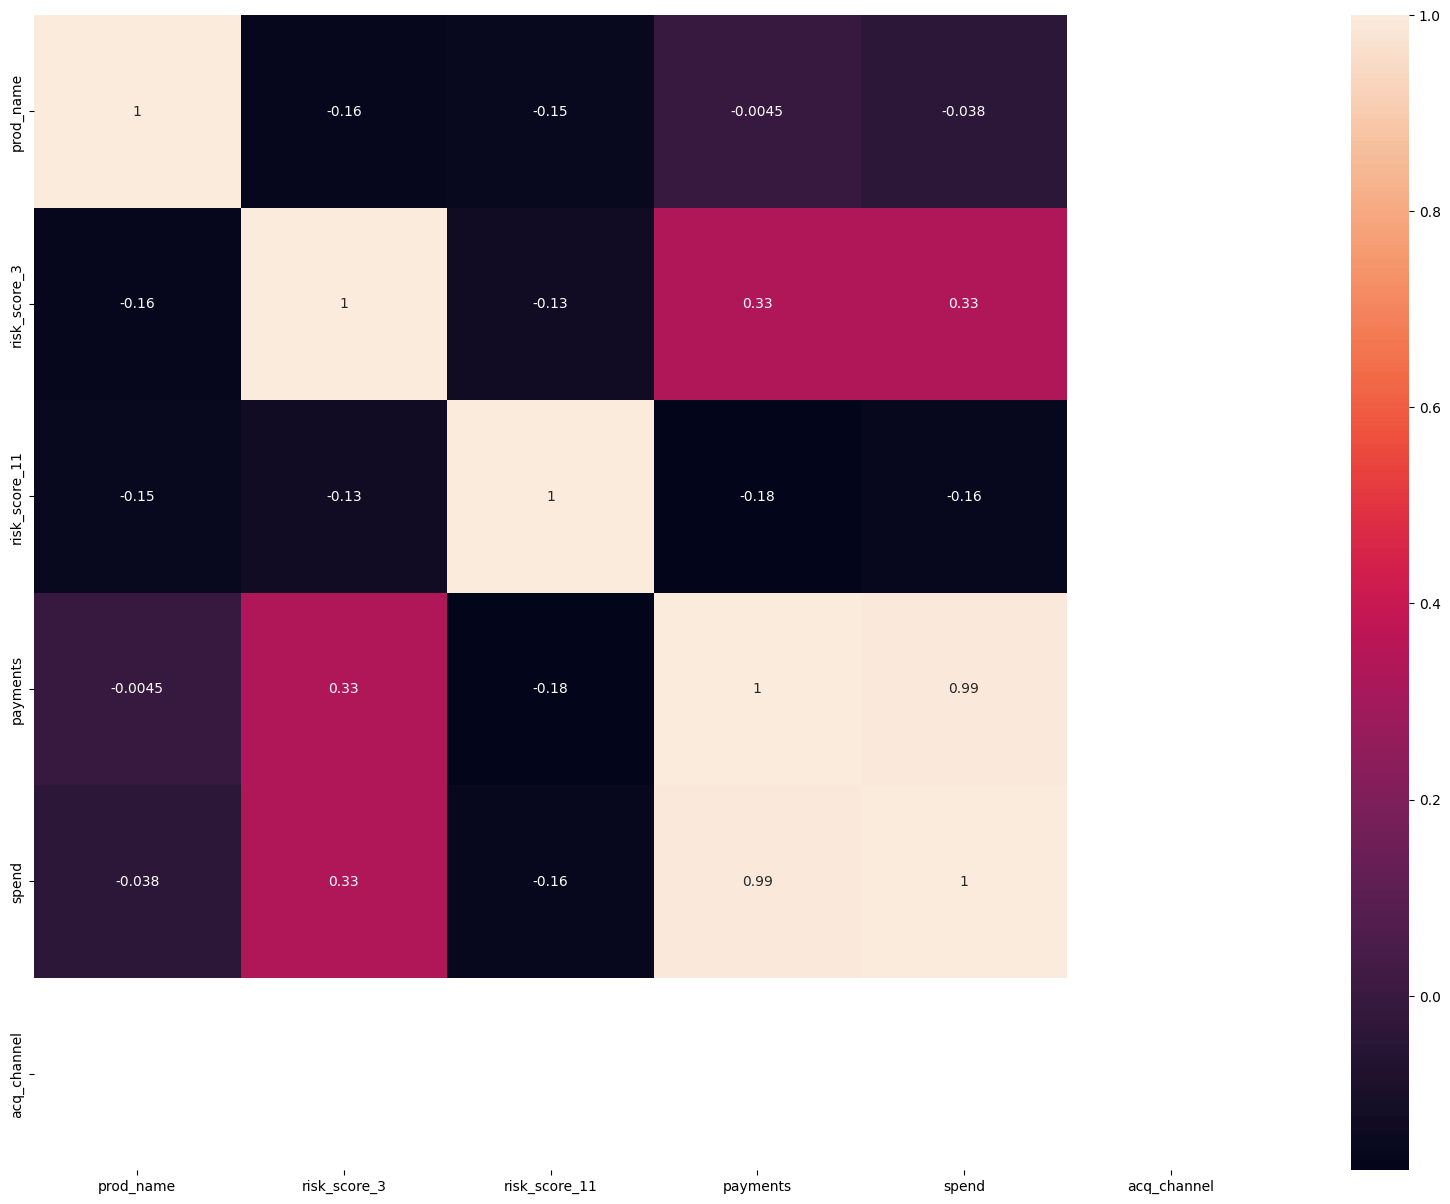

In [1410]:
df = all
corr = df[['prod_name', 'risk_score_3', 'risk_score_11', 'payments', 'spend', 'acq_channel']].corr()
df.info()
corr
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)